In [871]:
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set_style('white')

In [902]:
data = pd.read_csv('./OriginalData/training_input.csv',sep = ";")
target = pd.read_csv('./OriginalData/training_output.csv',sep =';')
data['TARGET'] = target['TARGET']

In [903]:
data.columns

Index(['ID', 'date', 'product_id', 'volatility 09:30:00',
       'volatility 09:35:00', 'volatility 09:40:00', 'volatility 09:45:00',
       'volatility 09:50:00', 'volatility 09:55:00', 'volatility 10:00:00',
       ...
       'return 13:15:00', 'return 13:20:00', 'return 13:25:00',
       'return 13:30:00', 'return 13:35:00', 'return 13:40:00',
       'return 13:45:00', 'return 13:50:00', 'return 13:55:00', 'TARGET'],
      dtype='object', length=112)

In [904]:
target['TARGET'].describe()

count    636313.000000
mean          0.183569
std           0.155562
min           0.000132
25%           0.098403
50%           0.141679
75%           0.214632
max           7.581517
Name: TARGET, dtype: float64

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


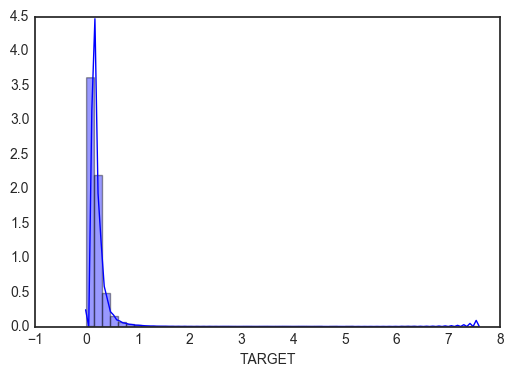

In [905]:
sns.distplot(target['TARGET']);

Volatility can be very low but also very high. All the observations are positive and they are not normally distributed at all. We'll also take a look at the logarithm of volatility.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


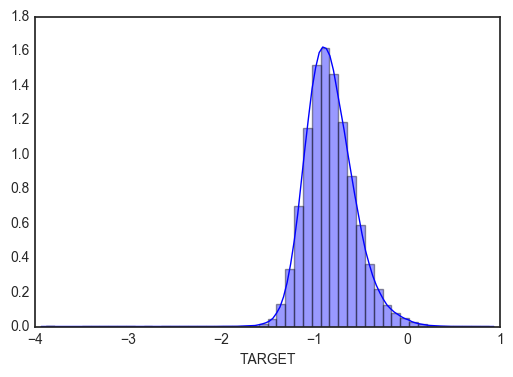

In [906]:
sns.distplot(np.log10(target['TARGET']));

That is much nicer; it looks much more like a normal distribution, though the distribution is asymetric and peaked.

In [907]:
print('Kurtosis = %f' %np.log10(target['TARGET']).kurt())
print('Skew = %f' %np.log10(target['TARGET']).skew())

Kurtosis = 0.915973
Skew = 0.473756


In [908]:
data['TARGET'] = target['TARGET']

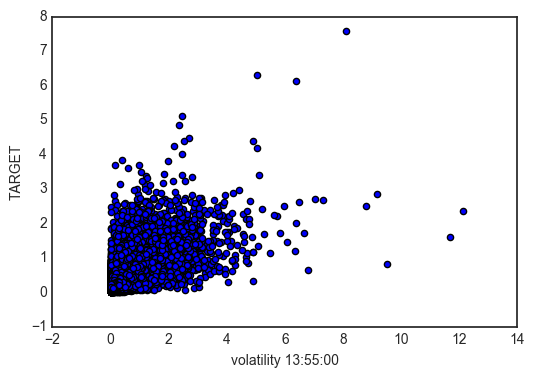

In [909]:
data.plot.scatter(x = 'volatility 13:55:00',y = 'TARGET');

So many variables; we can consider aggregating returns to observe what the target looks like depending on the trend of returns or the trend of volatilities.

In [910]:
import re

keys_returns = []

for key in data.keys():
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in data.keys():
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]
        
data['TREND_VOLATILITY'] = np.exp(np.mean(np.log10(data[keys_volatility]),axis = 1))
data['TREND_RETURNS'] = np.mean(data[keys_returns],axis = 1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log10


In [911]:
# Other simple features

data['TREND_VOLATILITY'] = np.exp(np.mean(np.log10(data[keys_volatility]),axis = 1))
data['TREND_RETURNS'] = np.mean(data[keys_returns],axis = 1)
data['STD_RETURNS'] = np.std(data[keys_returns],axis = 1)
data['EXP_STD_RETURNS'] = np.exp(np.std(data[keys_returns],axis = 1))
data['LOG_STD_RETURNS'] = np.log10(np.std(data[keys_returns],axis = 1))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log10


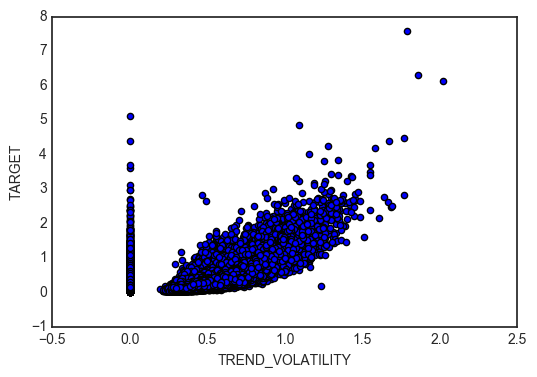

In [912]:
data.plot.scatter(x = 'TREND_VOLATILITY',y = 'TARGET');

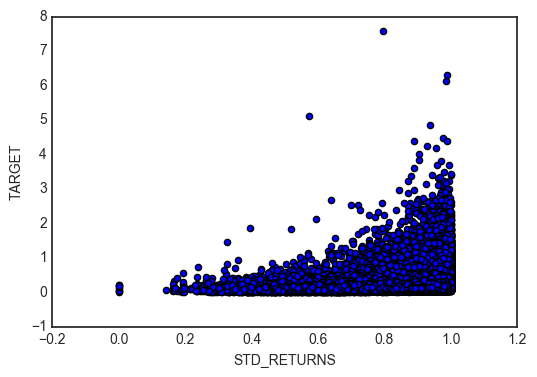

In [913]:
data.plot.scatter(x = 'STD_RETURNS',y = 'TARGET');

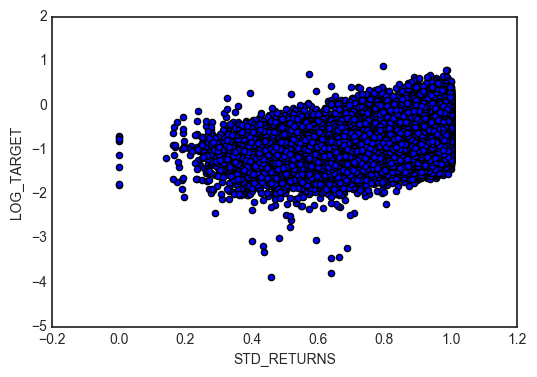

In [914]:
data.plot.scatter(x = 'STD_RETURNS',y = 'LOG_TARGET');

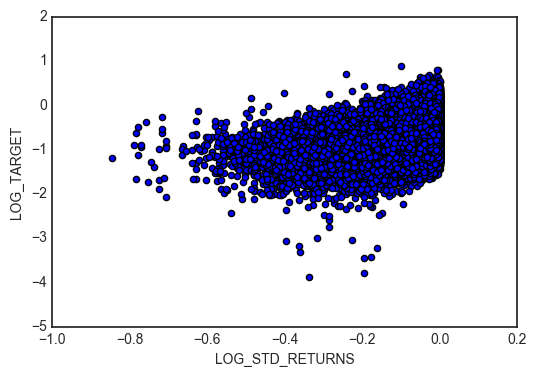

In [915]:
data.plot.scatter(x = 'LOG_STD_RETURNS',y = 'LOG_TARGET');

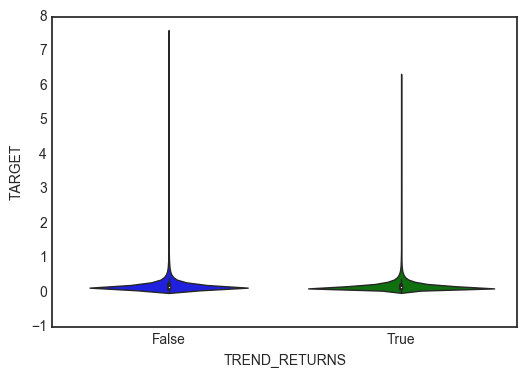

In [916]:
ax = sns.violinplot(x = data['TREND_RETURNS'] >= 0 ,y = data['TARGET']);

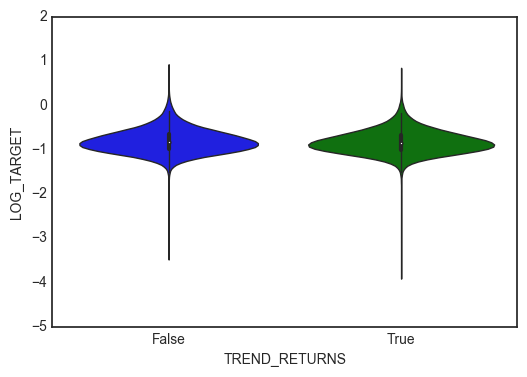

In [917]:
ax = sns.violinplot(x = data['TREND_RETURNS'] >= 0 ,y = data['LOG_TARGET']);

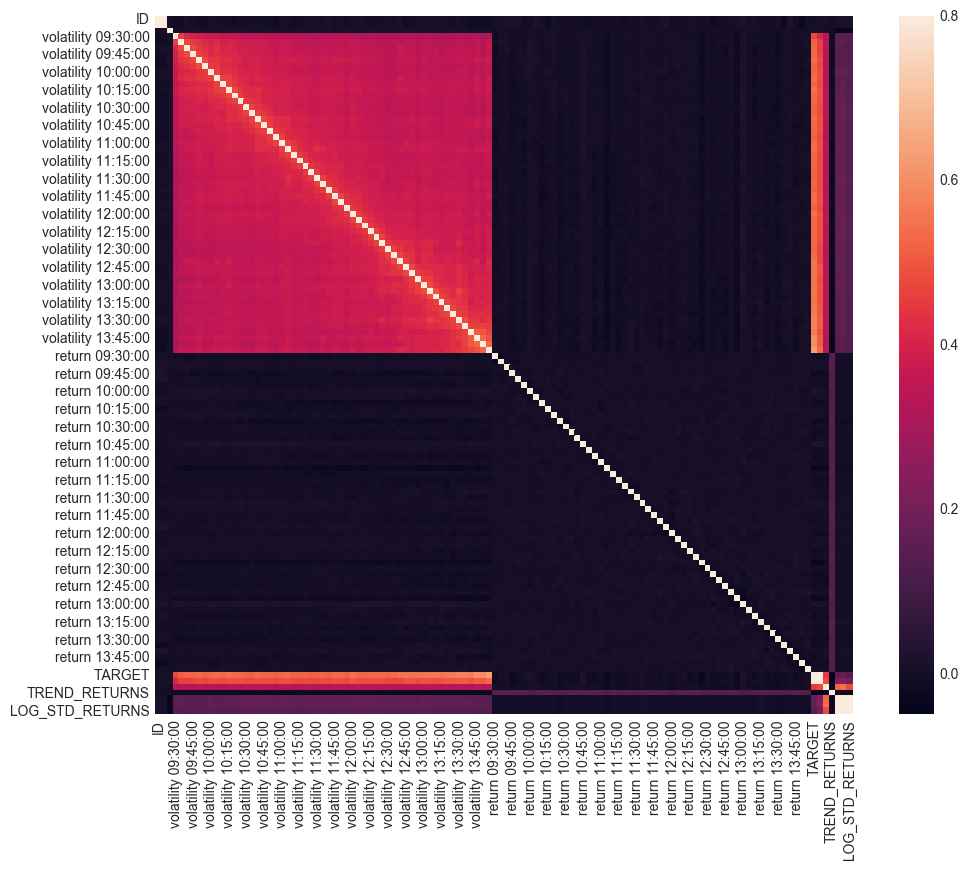

In [918]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [919]:
corrmat

ID      date  product_id  volatility 09:30:00  \
ID                   1.000000  0.999999    0.000463            -0.012040   
date                 0.999999  1.000000   -0.000014            -0.012058   
product_id           0.000463 -0.000014    1.000000             0.002676   
volatility 09:30:00 -0.012040 -0.012058    0.002676             1.000000   
volatility 09:35:00 -0.008761 -0.008780    0.007808             0.463230   
volatility 09:40:00  0.006887  0.006868    0.008647             0.414891   
volatility 09:45:00 -0.006004 -0.006020    0.008374             0.396774   
volatility 09:50:00 -0.009705 -0.009729    0.009113             0.390891   
volatility 09:55:00 -0.010688 -0.010691    0.008178             0.378795   
volatility 10:00:00  0.005726  0.005723    0.006198             0.374540   
volatility 10:05:00 -0.003693 -0.003710    0.007484             0.372752   
volatility 10:10:00 -0.003226 -0.003246    0.006600             0.356103   
volatility 10:15:00 -0.000416 -0.000439    0.008008             0.366645   
volatility 10:20:00 -0.008890 -0.008913    0.008351             0.362114   
volatility 10:25:00 -0.000172 -0.000197    0.007975             0.349785   
volatility 10:30:00 -0.003870 -0.003893    0.005316             0.344558   
volatility 10:35:00 -0.000414 -0.000438    0.005937             0.344486   
volatility 10:40:00 -0.003689 -0.003721    0.007613             0.346150   
volatility 10:45:00 -0.003595 -0.003609    0.007370             0.341177   
volatility 10:50:00 -0.007651 -0.007672    0.005976             0.340639   
volatility 10:55:00 -0.010113 -0.010143    0.006273             0.338413   
volatility 11:00:00 -0.001231 -0.001249    0.006616             0.338798   
volatility 11:05:00  0.002045  0.002018    0.006047             0.337402   
volatility 11:10:00 -0.009051 -0.009075    0.007086             0.326195   
volatility 11:15:00 -0.002215 -0.002242    0.007031             0.324123   
volatility 11:20:00  0.000140  0.000113    0.006722             0.330782   
volatility 11:25:00  0.003498  0.003470    0.006445             0.321254   
volatility 11:30:00  0.005560  0.005534    0.005455             0.320969   
volatility 11:35:00 -0.003999 -0.004034    0.006910             0.331901   
volatility 11:40:00  0.009840  0.009810    0.005937             0.322856   
...                       ...       ...         ...                  ...   
return 12:05:00     -0.002208 -0.002193    0.000688             0.001595   
return 12:10:00     -0.006069 -0.006066    0.002107            -0.001784   
return 12:15:00      0.007770  0.007767    0.001696            -0.002979   
return 12:20:00     -0.001475 -0.001454   -0.000559            -0.003842   
return 12:25:00     -0.001592 -0.001590    0.000449            -0.013340   
return 12:30:00      0.000400  0.000382   -0.001432            -0.001871   
return 12:35:00     -0.014510 -0.014500    0.000569            -0.007693   
return 12:40:00     -0.008478 -0.008486   -0.001010            -0.002604   
return 12:45:00     -0.002107 -0.002092   -0.000179            -0.009465   
return 12:50:00     -0.005026 -0.005036    0.000081             0.005368   
return 12:55:00      0.007370  0.007389   -0.000102            -0.012619   
return 13:00:00      0.014864  0.014860   -0.001232             0.012625   
return 13:05:00     -0.002190 -0.002188   -0.000599            -0.000780   
return 13:10:00      0.009174  0.009181    0.001577            -0.009841   
return 13:15:00     -0.001845 -0.001863    0.000686            -0.002503   
return 13:20:00     -0.007025 -0.007048    0.000107            -0.003605   
return 13:25:00     -0.001511 -0.001499   -0.001297            -0.005681   
return 13:30:00      0.007475  0.007465   -0.000617            -0.013266   
return 13:35:00     -0.019980 -0.019967   -0.001088            -0.003557   
return 13:40:00      0.022128  0.022124   -0.000889             0.002856   
return 13:45:00     -0.005038 -0.005041    0.001177            -0.003405   

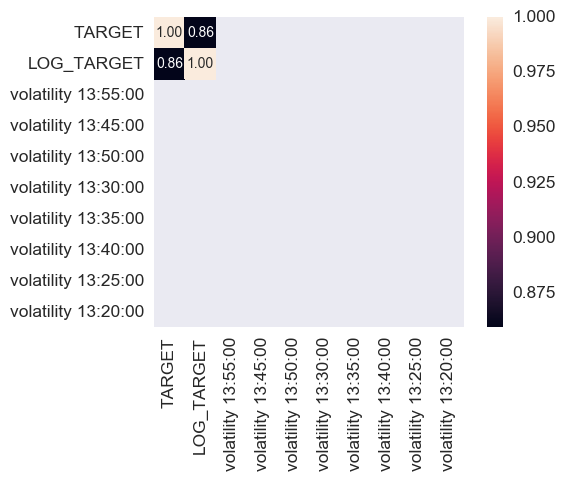

In [920]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'TARGET')['TARGET'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [921]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
return 09:30:00      28091  0.044147
volatility 09:30:00  28091  0.044147
volatility 12:55:00  10034  0.015769
return 12:55:00      10034  0.015769
return 13:10:00       9992  0.015703
volatility 13:10:00   9992  0.015703
return 13:05:00       9879  0.015525
volatility 13:05:00   9879  0.015525
volatility 12:40:00   9878  0.015524
return 12:40:00       9878  0.015524
return 12:50:00       9848  0.015477
volatility 12:50:00   9848  0.015477
volatility 12:35:00   9846  0.015474
return 12:35:00       9846  0.015474
volatility 12:25:00   9609  0.015101
return 12:25:00       9609  0.015101
return 12:45:00       9591  0.015073
volatility 12:45:00   9591  0.015073
volatility 12:20:00   9411  0.014790
return 12:20:00       9411  0.014790

Most of the time, when we are missing data it is the opening data; it also makes sense that we miss data in pairs; either it wasnt recorded, trading was stopped, or an event we dont know about stopped recording. The number of missing values is very small so we can replace them manually with the median for example.

In [922]:
# record missing data

missing_data = data.isnull()
data['HAS_NULL'] = missing_data.any(axis = 1)*1

In [923]:
#dealing with missing data
data = data.fillna(data.median())
# Other simple features

data['STD_RETURNS'] = np.std(data[keys_returns],axis = 1)
data['EXP_STD_RETURNS'] = np.exp(np.std(data[keys_returns],axis = 1))
data['LOG_STD_RETURNS'] = np.log10(np.std(data[keys_returns],axis = 1))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log10


outlier analysis

In [924]:
from sklearn.preprocessing import StandardScaler



#standardizing data
saleprice_scaled = StandardScaler().fit_transform(data['TARGET'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.17918894]
 [-1.17900127]
 [-1.17772451]
 [-1.17760839]
 [-1.17691064]
 [-1.17632357]
 [-1.17577085]
 [-1.17452733]
 [-1.17422091]
 [-1.17355873]]

outer range (high) of the distribution:
[[ 25.74985656]
 [ 26.01188912]
 [ 26.96700211]
 [ 27.01913955]
 [ 27.54183503]
 [ 29.96888675]
 [ 31.72453342]
 [ 38.27782458]
 [ 39.39759761]
 [ 47.55626141]]


For scaled data, this makes little sense. Instead, consider log volatilities which are more normally distributed.

In [925]:
from sklearn.preprocessing import StandardScaler



#standardizing data
saleprice_scaled = StandardScaler().fit_transform(data['LOG_TARGET'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-11.54953608]
 [-11.22203524]
 [ -9.90447951]
 [ -9.82405278]
 [ -9.40940749]
 [ -9.12680919]
 [ -8.89891387]
 [ -8.47874464]
 [ -8.38983175]
 [ -8.21269121]]

outer range (high) of the distribution:
[[ 5.48242697]
 [ 5.4983428 ]
 [ 5.55508547]
 [ 5.55812725]
 [ 5.58831502]
 [ 5.72165028]
 [ 5.81177544]
 [ 6.1103005 ]
 [ 6.15629635]
 [ 6.45742714]]


Better.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


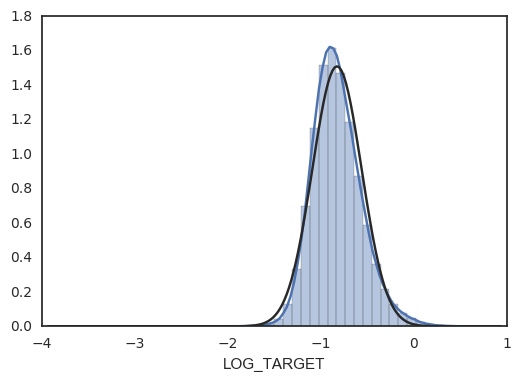

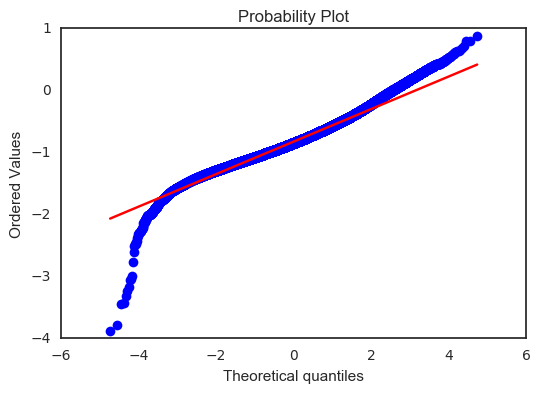

In [114]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats

sns.distplot(data['LOG_TARGET'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['LOG_TARGET'], plot=plt)

It is very problematic that the tail end of the log volatilties is not normal at all and goes far far away from what you would expect from a normal variable. Maybe a transformation would allow us to get rid of this very heavy tail at the end of the distribution. We need to think about this. For instance, it could be an exponentially decaying function for x up until a threshold and the identity for x above that; but we would lose the bijective aspect...

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


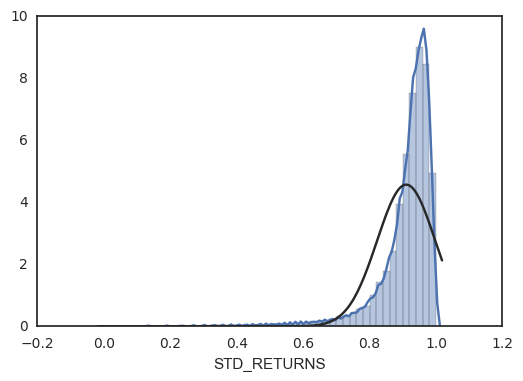

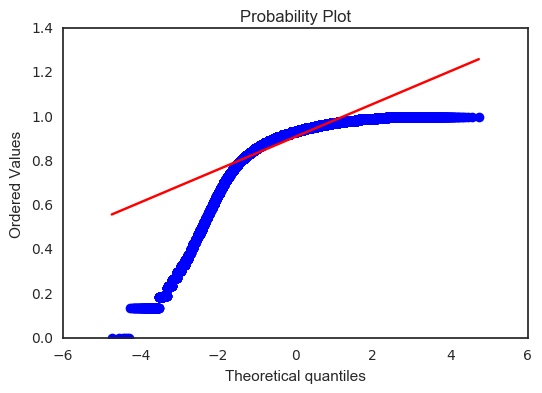

In [115]:
#histogram and normal probability plot
sns.distplot(data['STD_RETURNS'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['STD_RETURNS'], plot=plt)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


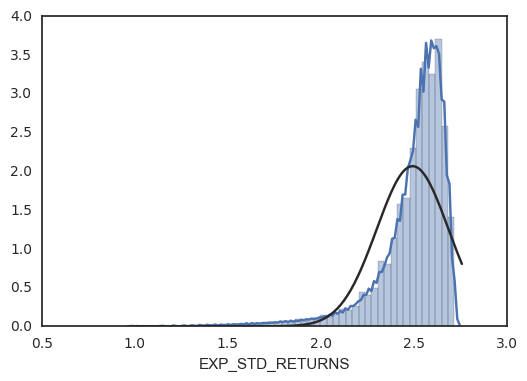

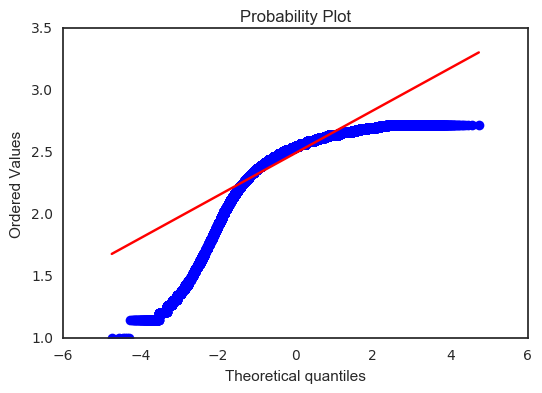

In [116]:
#histogram and normal probability plot
sns.distplot(data['EXP_STD_RETURNS'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['EXP_STD_RETURNS'], plot=plt)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


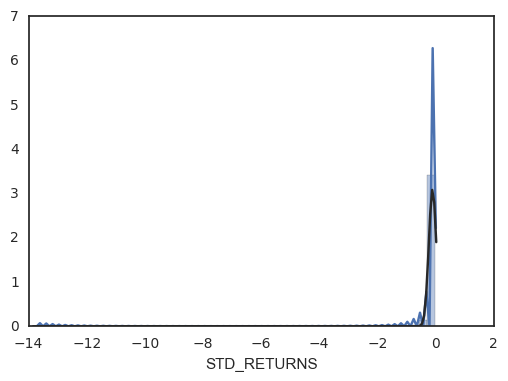

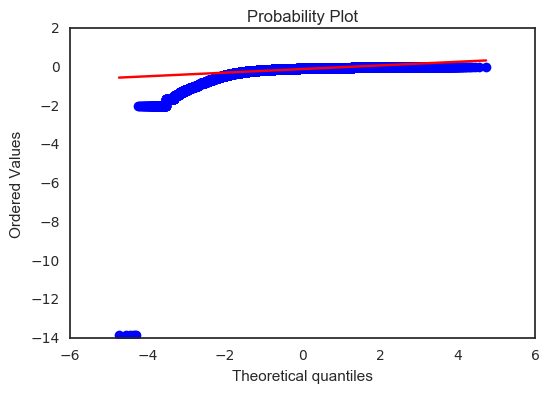

In [117]:
#histogram and normal probability plot
sns.distplot(np.log(data['STD_RETURNS']+1e-6), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(data['STD_RETURNS']+1e-6), plot=plt)

In [97]:
data['LOG_STD_RETURNS'].dropna()

0        -0.016069
1        -0.044014
2        -0.000298
3        -0.010997
4        -0.044836
5        -0.004135
6        -0.025912
7        -0.040396
8        -0.016310
9        -0.021839
10       -0.004135
11       -0.018894
12       -0.021839
13       -0.021921
14       -0.015109
15       -0.021921
16       -0.009436
17       -0.013123
18       -0.050682
19       -0.004743
20       -0.104758
21       -0.015109
22       -0.018003
23       -0.095199
24        0.000000
25       -0.037988
26       -0.007809
27       -0.016310
28       -0.012491
29       -0.017034
            ...   
636283   -0.079181
636284   -0.028613
636285   -0.004743
636286   -0.009436
636287   -0.026921
636288   -0.039680
636289   -0.083186
636290   -0.030234
636291   -0.034381
636292   -0.005964
636293   -0.050306
636294   -0.169328
636295   -0.039680
636296   -0.039680
636297   -0.025158
636298   -0.042922
636299   -0.043741
636300   -0.030234
636301   -0.030234
636302   -0.023160
636303   -0.054094
636304   -0.

Since there are several market events during the morning, we will form standard deviations based on each period before and after those market events and during. There are peaks at 10, 10:30, 11 and 11:30. After that, we should have no market event. Since time stamps correspond to the start of the computation period, we will have those market events at the corresponding time stamps.
So we form:
- period_1, from 9:30 to 9:55
- period_2, from 10:05 to 10:25
- period_3, from 10:35 to 10:55
- period_4, from 11:05 to 11:25
- period_5, from 11:35 to 13:55
- event_time_1 : 10:00
- event_time_2 : 10:30
- event_time_3 : 11:00
- event_time_4 : 11:30

In [926]:
period_1_times = ['09:30:00','09:35:00','09:40:00','09:45:00','09:50:00','09:55:00']
period_2_times = ['10:05:00','10:10:00','10:15:00','10:20:00','10:25:00']
period_3_times = ['10:35:00','10:40:00','10:45:00','10:50:00','10:55:00']
period_4_times = ['11:05:00','11:10:00','11:15:00','11:20:00','11:25:00']
period_5_times = ['11:35:00','11:40:00','11:45:00','11:50:00','11:55:00',
                  '12:00:00','12:05:00','12:10:00','12:15:00','10:20:00','12:25:00','12:30:00',
                  '12:35:00','12:40:00','12:45:00','12:50:00','12:55:00','13:00:00',
                 '13:05:00','13:10:00','13:15:00','13:20:00','13:25:00',
                 '13:30:00','13:35:00','13:40:00','13:45:00','13:50:00','13:55:00']

In [927]:
event_1_time = '10:00:00'
event_2_time = '10:30:00'
event_3_time = '11:00:00'
event_4_time = '11:30:00'

In [928]:
key_return = 'return '
key_volatility = 'volatility '

In [929]:
keys_times_P1 = [key_return + period_1_times[k] for k in range(len(period_1_times))]
keys_times_P1 += [key_volatility + period_1_times[k] for k in range(len(period_1_times))]

keys_times_P2 = [key_return + period_2_times[k] for k in range(len(period_2_times))]
keys_times_P2 += [key_volatility + period_2_times[k] for k in range(len(period_2_times))]

keys_times_P3 = [key_return + period_3_times[k] for k in range(len(period_3_times))]
keys_times_P3 += [key_volatility + period_3_times[k] for k in range(len(period_3_times))]

keys_times_P4 = [key_return + period_4_times[k] for k in range(len(period_4_times))]
keys_times_P4 += [key_volatility + period_4_times[k] for k in range(len(period_4_times))]

keys_times_P5 = [key_return + period_5_times[k] for k in range(len(period_5_times))]
keys_times_P5 += [key_volatility + period_5_times[k] for k in range(len(period_5_times))]

keys_event_1 = [key_return + event_1_time] + [key_volatility + event_1_time]
keys_event_2 = [key_return + event_2_time] + [key_volatility + event_2_time]
keys_event_3 = [key_return + event_3_time] + [key_volatility + event_3_time]
keys_event_4 = [key_return + event_4_time] + [key_volatility + event_4_time]

In [930]:
keys_returns = []

for key in keys_times_P1:
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in keys_times_P1:
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

data['P1_TREND_VOLATILITY'] = np.exp(np.mean(np.log10(data[keys_volatility]),axis = 1))
data['P1_TREND_RETURNS'] = np.mean(data[keys_returns],axis = 1)
data['P1_STD_RETURNS'] = np.std(data[keys_returns],axis = 1)
data['P1_EXP_STD_RETURNS'] = np.exp(np.std(data[keys_returns],axis = 1))
data['P1_LOG_STD_RETURNS'] = np.log10(np.std(data[keys_returns],axis = 1))


keys_returns = []

for key in keys_times_P2:
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in keys_times_P2:
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

data['P2_TREND_VOLATILITY'] = np.exp(np.mean(np.log10(data[keys_volatility]),axis = 1))
data['P2_TREND_RETURNS'] = np.mean(data[keys_returns],axis = 1)
data['P2_STD_RETURNS'] = np.std(data[keys_returns],axis = 1)
data['P2_EXP_STD_RETURNS'] = np.exp(np.std(data[keys_returns],axis = 1))
data['P2_LOG_STD_RETURNS'] = np.log10(np.std(data[keys_returns],axis = 1))


keys_returns = []

for key in keys_times_P3:
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in keys_times_P3:
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

data['P3_TREND_VOLATILITY'] = np.exp(np.mean(np.log10(data[keys_volatility]),axis = 1))
data['P3_TREND_RETURNS'] = np.mean(data[keys_returns],axis = 1)
data['P3_STD_RETURNS'] = np.std(data[keys_returns],axis = 1)
data['P3_EXP_STD_RETURNS'] = np.exp(np.std(data[keys_returns],axis = 1))
data['P3_LOG_STD_RETURNS'] = np.log10(np.std(data[keys_returns],axis = 1))

keys_returns = []

for key in keys_times_P4:
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in keys_times_P4:
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

data['P4_TREND_VOLATILITY'] = np.exp(np.mean(np.log10(data[keys_volatility]),axis = 1))
data['P4_TREND_RETURNS'] = np.mean(data[keys_returns],axis = 1)
data['P4_STD_RETURNS'] = np.std(data[keys_returns],axis = 1)
data['P4_EXP_STD_RETURNS'] = np.exp(np.std(data[keys_returns],axis = 1))
data['P4_LOG_STD_RETURNS'] = np.log10(np.std(data[keys_returns],axis = 1))


keys_returns = []

for key in keys_times_P5:
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in keys_times_P5:
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

data['P5_TREND_VOLATILITY'] = np.exp(np.mean(np.log10(data[keys_volatility]),axis = 1))
data['P5_TREND_RETURNS'] = np.mean(data[keys_returns],axis = 1)
data['P5_STD_RETURNS'] = np.std(data[keys_returns],axis = 1)
data['P5_EXP_STD_RETURNS'] = np.exp(np.std(data[keys_returns],axis = 1))
data['P5_LOG_STD_RETURNS'] = np.log10(np.std(data[keys_returns],axis = 1))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide by zero encountered in log10
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: RuntimeWarning: divide by zero encountered in log10
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: RuntimeWarning: divide by zero encountered in log10
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:57: RuntimeWarning: divide by zero encountered in log10
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:61: RuntimeWarning: divide by zero encountered in log10
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:77: RuntimeWarning: divide by zero encountered in log10
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:81: RuntimeWarning: divide by zero encountered in log10
C:\Program Files

In [931]:
keys_returns = []

for key in keys_event_1:
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in keys_event_1:
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

data['E1_RETURN'] = data[keys_returns]
data['E1_VOLATILITY'] = data[keys_volatility]

keys_returns = []

for key in keys_event_2:
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in keys_event_2:
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

data['E2_RETURN'] = data[keys_returns]
data['E2_VOLATILITY'] = data[keys_volatility]

keys_returns = []

for key in keys_event_3:
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in keys_event_3:
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

data['E3_RETURN'] = data[keys_returns]
data['E3_VOLATILITY'] = data[keys_volatility]


keys_returns = []

for key in keys_event_4:
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in keys_event_4:
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

data['E4_RETURN'] = data[keys_returns]
data['E4_VOLATILITY'] = data[keys_volatility]

Let's examine what the distributions of our newly created variables are.

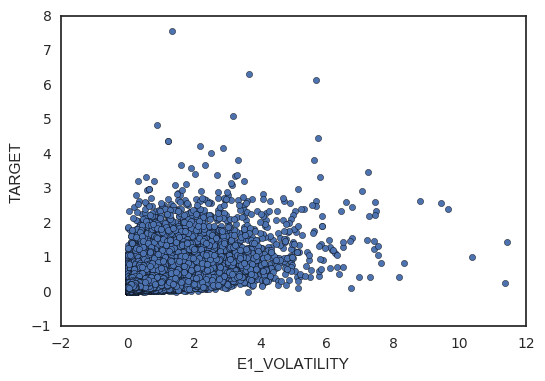

In [155]:
data.plot.scatter(x = 'E1_VOLATILITY',y = 'TARGET');

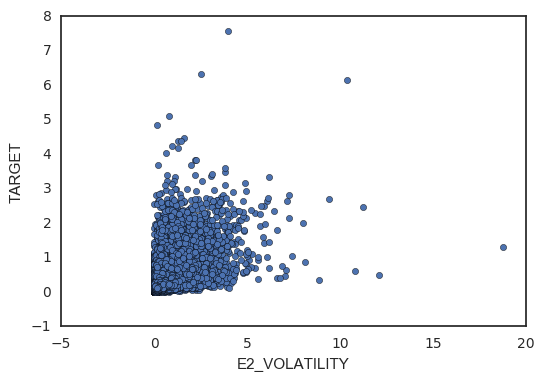

In [156]:
data.plot.scatter(x = 'E2_VOLATILITY',y = 'TARGET');

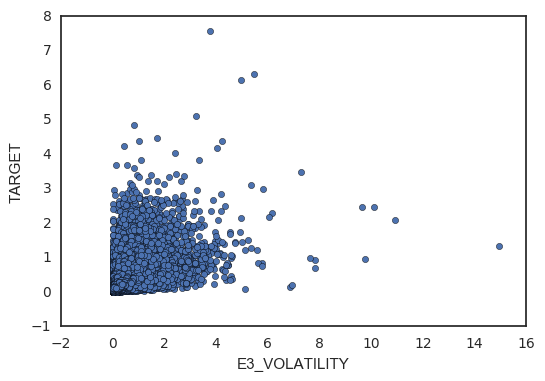

In [157]:
data.plot.scatter(x = 'E3_VOLATILITY',y = 'TARGET');

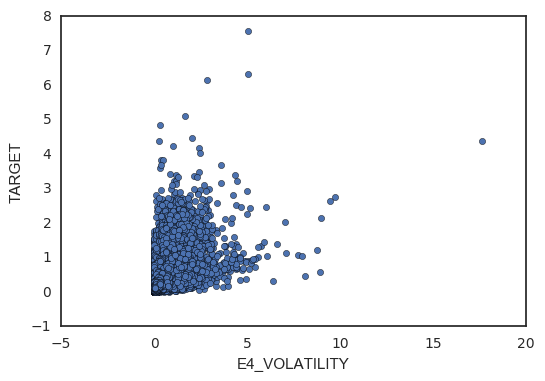

In [158]:
data.plot.scatter(x = 'E4_VOLATILITY',y = 'TARGET');

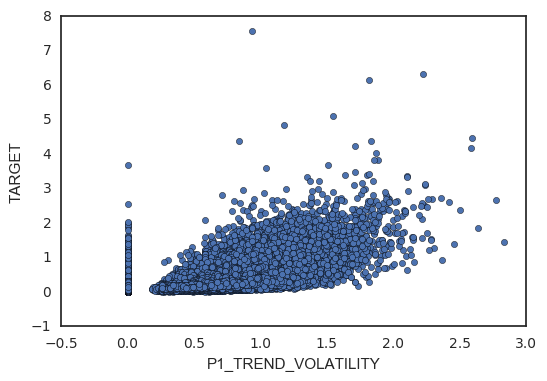

In [159]:
data.plot.scatter(x = 'P1_TREND_VOLATILITY',y = 'TARGET');

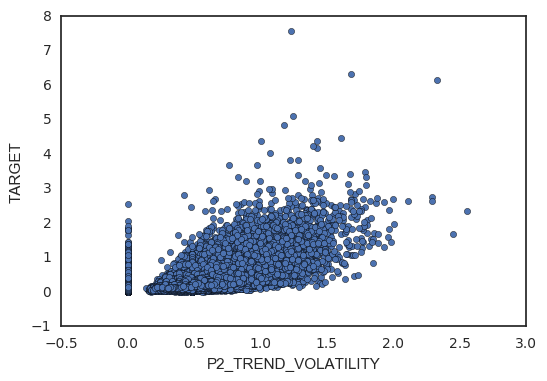

In [160]:
data.plot.scatter(x = 'P2_TREND_VOLATILITY',y = 'TARGET');

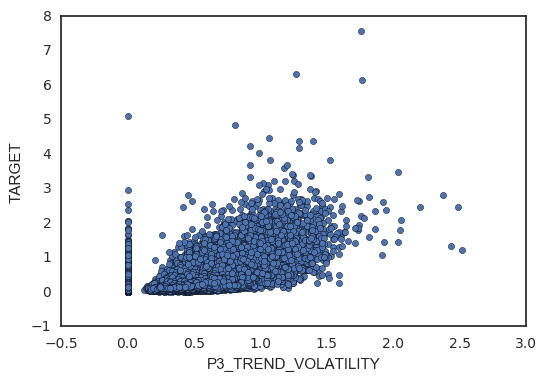

In [161]:
data.plot.scatter(x = 'P3_TREND_VOLATILITY',y = 'TARGET');

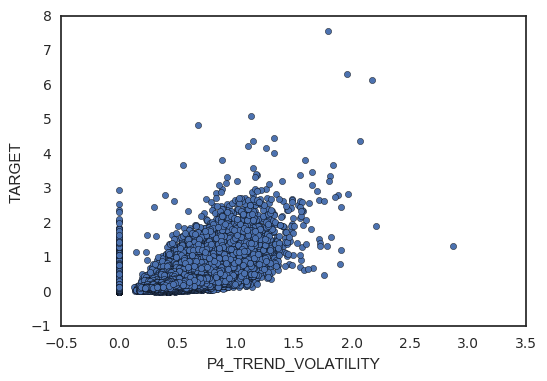

In [162]:
data.plot.scatter(x = 'P4_TREND_VOLATILITY',y = 'TARGET');

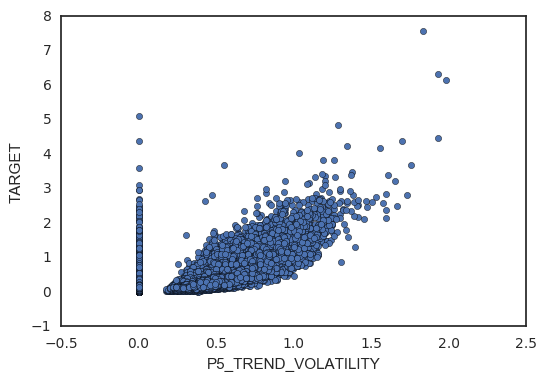

In [163]:
data.plot.scatter(x = 'P5_TREND_VOLATILITY',y = 'TARGET');

In [177]:
keys_periods = []

for key in data.keys():
    g = re.split('P._',key)
    if len(g)>1:
        keys_periods  += [key]
        
keys_events = []

for key in data.keys():
    g = re.split('E._',key)
    if len(g)>1:
        keys_events += [key]

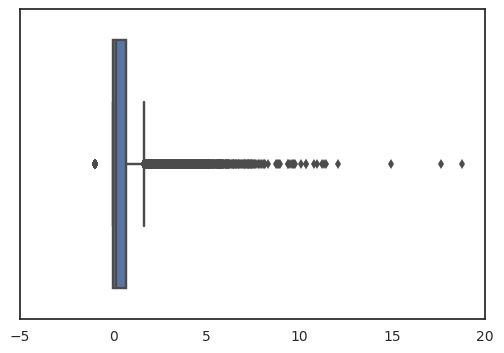

In [184]:
sns.boxplot(data[keys_events])
plt.show()

In [183]:
data[keys_events]

E1_RETURN  E1_VOLATILITY  E2_RETURN  E2_VOLATILITY  E3_RETURN  \
0             1.0       0.327206       -1.0       0.575275       -1.0   
1             1.0       0.102745        0.0       0.023706       -1.0   
2             1.0       0.401979        1.0       0.259485       -1.0   
3            -1.0       0.341194       -1.0       0.175728       -1.0   
4            -1.0       0.162763       -1.0       0.040567       -1.0   
5             1.0       0.078081        1.0       0.067710       -1.0   
6            -1.0       0.449498        1.0       0.159946       -1.0   
7             1.0       0.173730        1.0       0.441475       -1.0   
8            -1.0       0.143915        1.0       0.084946       -1.0   
9            -1.0       0.209140       -1.0       0.161378       -1.0   
10           -1.0       0.122019        1.0       0.081120       -1.0   
11           -1.0       0.057982        1.0       0.079429       -1.0   
12           -1.0       0.517169        1.0       0.129162       -1.0   
13           -1.0       0.250102        1.0       0.304860       -1.0   
14           -1.0       0.181883       -1.0       0.080316       -1.0   
15           -1.0       0.338570        1.0       0.285539       -1.0   
16           -1.0       0.225077        1.0       0.036762       -1.0   
17           -1.0       0.186989       -1.0       0.241712       -1.0   
18           -1.0       0.200089       -1.0       0.149746       -1.0   
19            1.0       0.190641       -1.0       0.158023       -1.0   
20            0.0       0.000000        0.0       0.000000       -1.0   
21            1.0       0.101594       -1.0       0.167503       -1.0   
22           -1.0       0.423053        1.0       0.617126       -1.0   
23            1.0       0.293679        0.0       0.000000       -1.0   
24            1.0       0.190452       -1.0       0.159942       -1.0   
25            1.0       0.104432        1.0       0.096911       -1.0   
26           -1.0       0.445216       -1.0       0.150706       -1.0   
27            1.0       0.156251       -1.0       0.092106       -1.0   
28           -1.0       0.083602       -1.0       0.043709       -1.0   
29            1.0       0.138293        1.0       0.314305       -1.0   
...           ...            ...        ...            ...        ...   
636283        0.0       0.021023        1.0       0.168246        0.0   
636284        1.0       0.263314        1.0       0.612066       -1.0   
636285       -1.0       0.176594       -1.0       0.088682       -1.0   
636286       -1.0       0.525092        1.0       0.105473        0.0   
636287       -1.0       0.144302        1.0       0.348375       -1.0   
636288        1.0       0.302341        1.0       0.897890       -1.0   
636289        1.0       0.175992        0.0       0.033862        0.0   
636290        1.0       0.093554       -1.0       0.032585       -1.0   
636291        0.0       0.026974        1.0       0.242027       -1.0   
636292       -1.0       0.383738        1.0       0.187825        1.0   
636293        1.0       0.254349       -1.0       0.101409       -1.0   
636294        0.0       0.066007        1.0       0.589075        1.0   
636295        1.0       0.115403        1.0       0.057699        1.0   
636296        1.0       0.196856        1.0       0.156959       -1.0   
636297        1.0       0.217629        1.0       0.264621       -1.0   
636298       -1.0       0.048084        1.0       0.294911       -1.0   
636299        1.0       0.181304        1.0       0.318268        0.0   
636300        1.0       0.533487        1.0       0.600489       -1.0   
636301        1.0       0.090711        1.0       0.072343       -1.0   
636302        1.0       0.209994        1.0       0.758942       -1.0   
636303        0.0       0.039963        1.0       0.451280       -1.0   
636304        1.0       0.032074        1.0       0.096009        0.0   
636305        1.0       0.097026        1.0       0.258016       -

In [230]:
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

copy_data = data[keys_volatility+['TARGET','TREND_VOLATILITY','EXP_STD_RETURNS']].copy()
copy_data = copy_data

copy_data = copy_data.replace(np.inf,copy_data.median())
copy_data = copy_data.replace(-np.inf,copy_data.median())
copy_data = copy_data.fillna(copy_data.median())

y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = LinearSVR()

model.fit(X_train,y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [231]:
y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.42732126138191245

In [198]:
model.coef_

array([  1.83187941e-03,   7.94265651e-02,  -1.54242892e-03,
         9.24433797e-02,  -1.13629317e-04,   1.14338555e-01,
        -4.39627370e-04,   1.35722816e-01,   5.57202583e-02,
        -1.72252926e-03,   1.26678807e-01,  -7.47408286e-02,
        -2.47208793e-02,   8.22881187e-02,  -8.03758132e-04,
         7.82289434e-02,  -4.32053830e-02,  -4.59755811e-02,
         5.93729220e-02,  -5.77928641e-03,   7.04501297e-02,
        -3.96784313e-02,  -4.59968590e-02,   6.49500201e-02,
        -2.25023999e-03,   8.09892140e-02,  -4.83234983e-02,
        -3.68756660e-02,   9.91771370e-02,  -1.78893328e-02,
        -2.09827103e-02,  -6.93705397e-02,  -3.82694896e-03])

In [304]:
import re

keys_returns = []

for key in data.keys():
    g = re.split('return',key)
    if len(g)>1:
        keys_returns += [key]
        
keys_volatility = []

for key in data.keys():
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

np.mean(data[keys_volatility],axis = 0)

volatility 09:30:00    0.584382
volatility 09:35:00    0.477272
volatility 09:40:00    0.408130
volatility 09:45:00    0.362365
volatility 09:50:00    0.336104
volatility 09:55:00    0.308503
volatility 10:00:00    0.337733
volatility 10:05:00    0.294587
volatility 10:10:00    0.273136
volatility 10:15:00    0.267195
volatility 10:20:00    0.252428
volatility 10:25:00    0.242994
volatility 10:30:00    0.248104
volatility 10:35:00    0.234468
volatility 10:40:00    0.227735
volatility 10:45:00    0.219788
volatility 10:50:00    0.213063
volatility 10:55:00    0.208032
volatility 11:00:00    0.211613
volatility 11:05:00    0.204431
volatility 11:10:00    0.195924
volatility 11:15:00    0.191256
volatility 11:20:00    0.189579
volatility 11:25:00    0.187101
volatility 11:30:00    0.188078
volatility 11:35:00    0.181898
volatility 11:40:00    0.175096
volatility 11:45:00    0.173554
volatility 11:50:00    0.171956
volatility 11:55:00    0.170014
volatility 12:00:00    0.173996
volatili

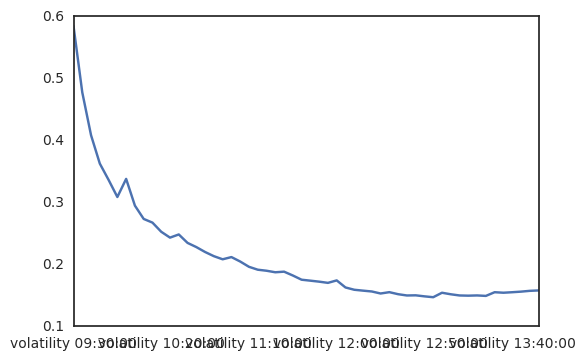

In [217]:
np.mean(data[keys_volatility],axis = 0).plot()
plt.show()

In [932]:
data['EVENT_P1'] = (data['E1_VOLATILITY'] >= 3*data['P1_TREND_VOLATILITY'])*1
data['EVENT_P2'] = (data['E2_VOLATILITY'] >= 3*data['P2_TREND_VOLATILITY'])*1
data['EVENT_P3'] = (data['E3_VOLATILITY'] >= 3*data['P3_TREND_VOLATILITY'])*1
data['EVENT_P4'] = (data['E4_VOLATILITY'] >= 3*data['P4_TREND_VOLATILITY'])*1

In [933]:
data['RATIO_E_P_1'] = data['E1_VOLATILITY']/data['P1_TREND_VOLATILITY']
data['RATIO_E_P_2'] = data['E2_VOLATILITY']/data['P2_TREND_VOLATILITY']
data['RATIO_E_P_3'] = data['E3_VOLATILITY']/data['P3_TREND_VOLATILITY']
data['RATIO_E_P_4'] = data['E4_VOLATILITY']/data['P4_TREND_VOLATILITY']

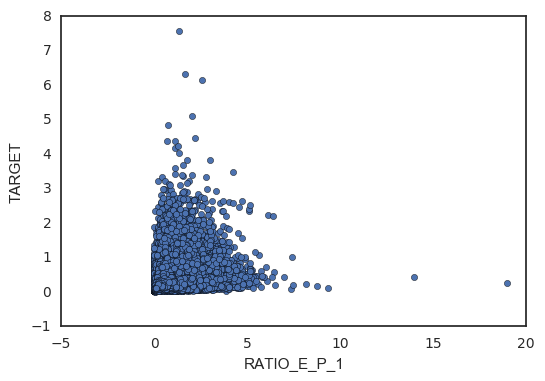

In [236]:
data.plot.scatter(x = 'RATIO_E_P_1',y = 'TARGET');

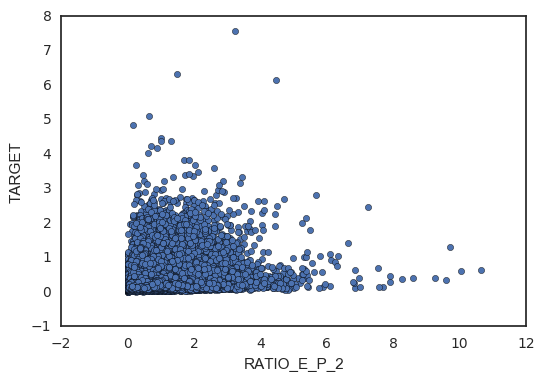

In [237]:
data.plot.scatter(x = 'RATIO_E_P_2',y = 'TARGET');

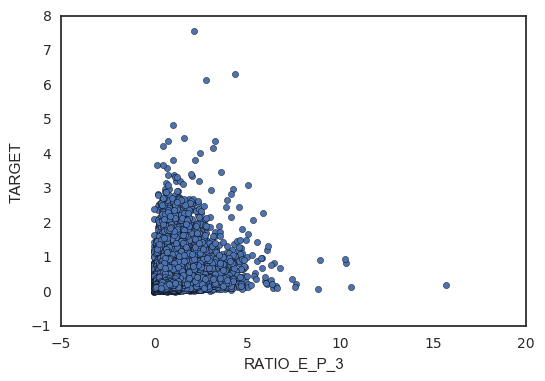

In [238]:
data.plot.scatter(x = 'RATIO_E_P_3',y = 'TARGET');

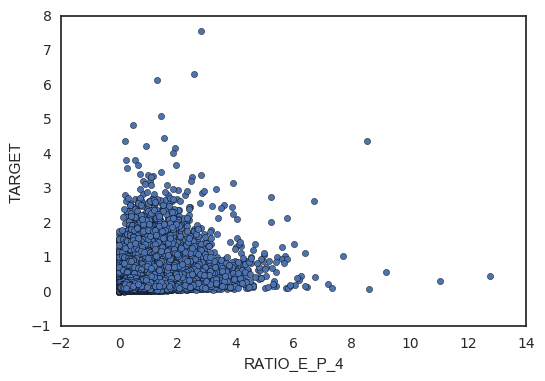

In [239]:
data.plot.scatter(x = 'RATIO_E_P_4',y = 'TARGET');

In [248]:
data['EVENT_P1']+data['EVENT_P2']+data['EVENT_P3']+data['EVENT_P4']

0         1
1         0
2         0
3         0
4         3
5         0
6         0
7         1
8         0
9         0
10        0
11        2
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        3
21        0
22        0
23        3
24        0
25        0
26        0
27        0
28        0
29        1
         ..
636283    0
636284    1
636285    1
636286    1
636287    0
636288    2
636289    1
636290    0
636291    0
636292    0
636293    1
636294    0
636295    0
636296    0
636297    0
636298    0
636299    0
636300    0
636301    0
636302    2
636303    1
636304    0
636305    0
636306    1
636307    0
636308    1
636309    0
636310    1
636311    3
636312    0
dtype: int32

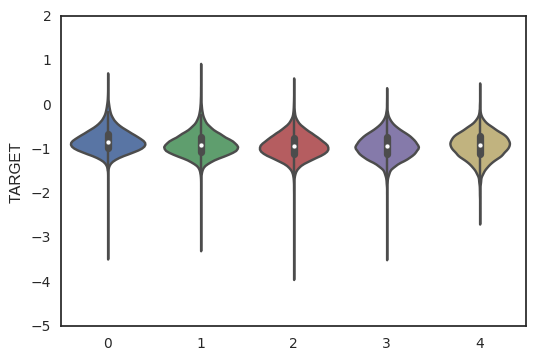

In [254]:
ax = sns.violinplot(x = data['EVENT_P1']+data['EVENT_P2']+data['EVENT_P3']+data['EVENT_P4'] ,y = np.log10(data['TARGET']));

In [934]:
keys_volatility = []

for key in data.keys():
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

data['HIGH_POINT_VOLATILITY'] = np.max(data[keys_volatility],axis = 1)
data['LOW_POINT_VOLATILITY'] = np.min(data[keys_volatility],axis = 1)

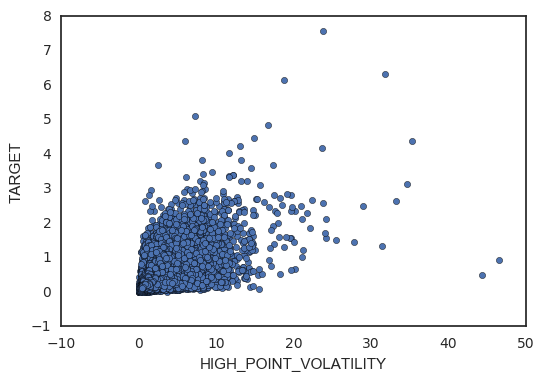

In [274]:
data.plot.scatter(x = 'HIGH_POINT_VOLATILITY',y = 'TARGET');

In [886]:
data['LOW_POINT_VOLATILITY'] = np.min(data[keys_volatility],axis = 1)

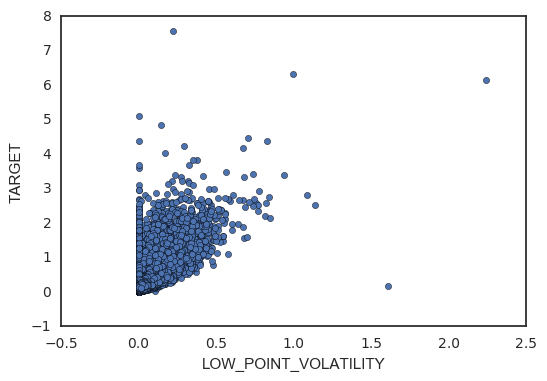

In [275]:
data.plot.scatter(x = 'LOW_POINT_VOLATILITY',y = 'TARGET');

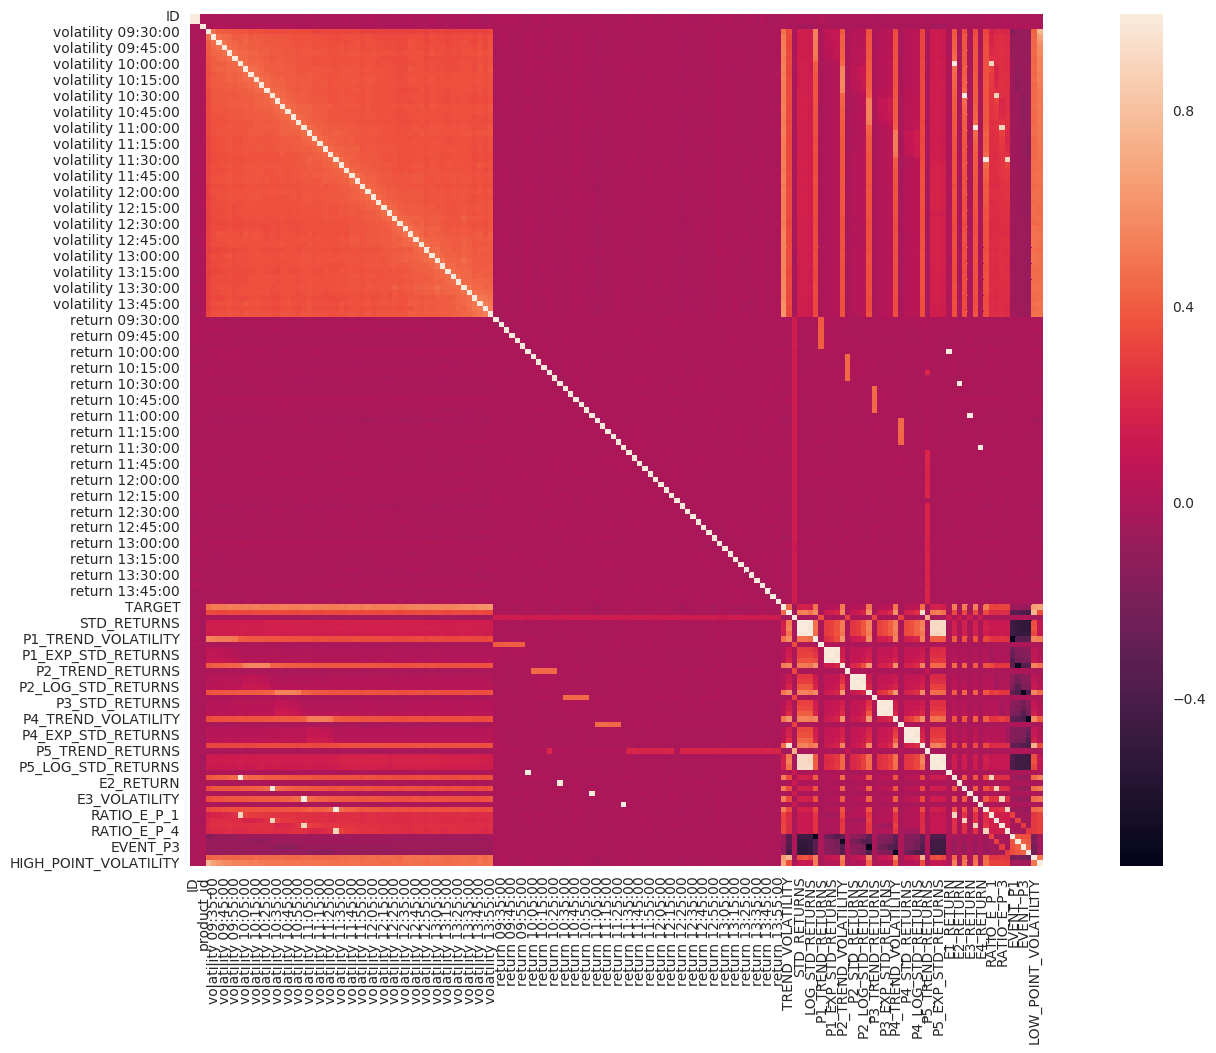

In [279]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 11))
sns.heatmap(corrmat,square=True);

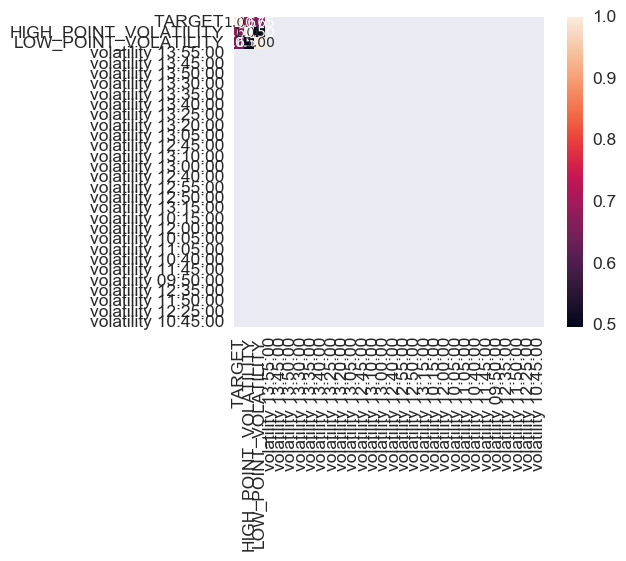

In [280]:
#saleprice correlation matrix
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'TARGET')['TARGET'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

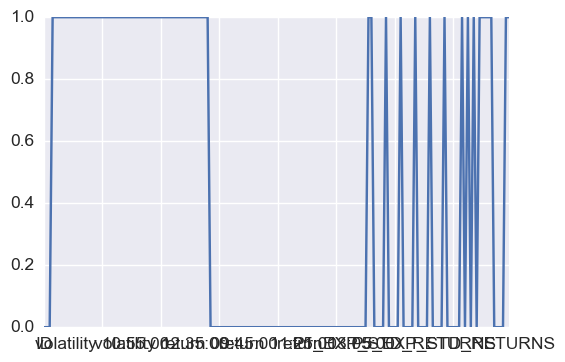

In [288]:
(np.abs(corrmat['TARGET']) >= 0.2).plot()
plt.show()

In [292]:
corrmat.loc[corrmat['TARGET'] >= 0.2]['TARGET']

volatility 09:30:00      0.475243
volatility 09:35:00      0.517914
volatility 09:40:00      0.529939
volatility 09:45:00      0.522135
volatility 09:50:00      0.538306
volatility 09:55:00      0.520443
volatility 10:00:00      0.527727
volatility 10:05:00      0.541409
volatility 10:10:00      0.526863
volatility 10:15:00      0.546809
volatility 10:20:00      0.528841
volatility 10:25:00      0.531336
volatility 10:30:00      0.520338
volatility 10:35:00      0.519434
volatility 10:40:00      0.540174
volatility 10:45:00      0.533491
volatility 10:50:00      0.526816
volatility 10:55:00      0.519874
volatility 11:00:00      0.531141
volatility 11:05:00      0.541262
volatility 11:10:00      0.524473
volatility 11:15:00      0.520805
volatility 11:20:00      0.527406
volatility 11:25:00      0.520706
volatility 11:30:00      0.521122
volatility 11:35:00      0.530857
volatility 11:40:00      0.520371
volatility 11:45:00      0.538740
volatility 11:50:00      0.535931
volatility 11:

The correlation between the target variable and the decomposed trend volatilities is higher than the original one. It also seems to decay from about 11 which makes sense if we look at the overall graphs: it seems the vol is closer to the vol of that time than at any other time.

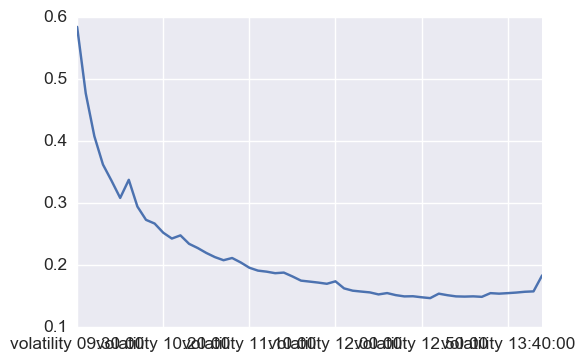

In [293]:
np.mean(data[keys_volatility+['TARGET']],axis = 0).plot()
plt.show()

## We could try to adjust the observed volatilities by their overall decay, to obtain variables without units that should vary the same way instead of being constrained differently.

## Try adding different measures of volatility since the true measure used for the challenge is not known.
Ideas:
- upper and lower Bollinger band using short moving average for price directions and longuer moving average for stds
- number of times the average has gone above or under the bollinger band, in separate features
- support and resistance level for the volatility
- number of breakouts, that is the number of times the highest point of the day was surpassed, for volatility
- down pressure, the maximum number of times volatility has gone down consecutively, similar for prices
- up pressure, the maximum number of times volatility has gone up consecutively, similar for prices
- split returns into up, down or sideways trend

In [935]:
up_band = data[keys_volatility].rolling(window = 10,axis = 1).mean() + data[keys_volatility].rolling(window = 20,axis = 1).std()
down_band = data[keys_volatility].rolling(window = 10,axis = 1).mean() - data[keys_volatility].rolling(window = 20,axis = 1).std()

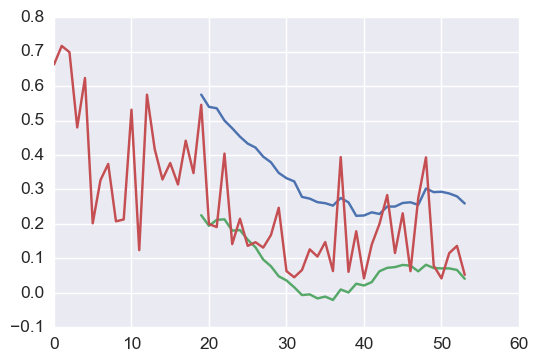

In [400]:
plt.clf()
plt.plot(up_band.values[0,:])
plt.plot(down_band.values[0,:])
plt.plot(data[keys_volatility].values[0,:])
plt.show()

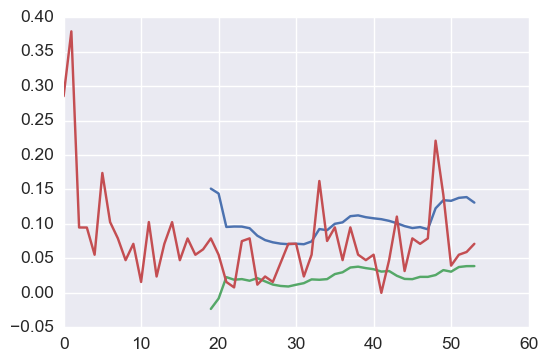

In [403]:
plt.clf()
plt.plot(up_band.values[1,:])
plt.plot(down_band.values[1,:])
plt.plot(data[keys_volatility].values[1,:])
plt.show()

In [936]:
N_ups = np.sum(up_band < data[keys_volatility],axis = 1)/np.sum(up_band.isnull(),axis = 1)
N_downs = np.sum(down_band > data[keys_volatility],axis = 1)/np.sum(down_band.isnull(),axis = 1)

In [937]:
data['EXCEEDANCES_UP_BOLLINGER'] = N_ups
data['EXCEEDANCES_DOWN_BOLLINGER'] = N_downs

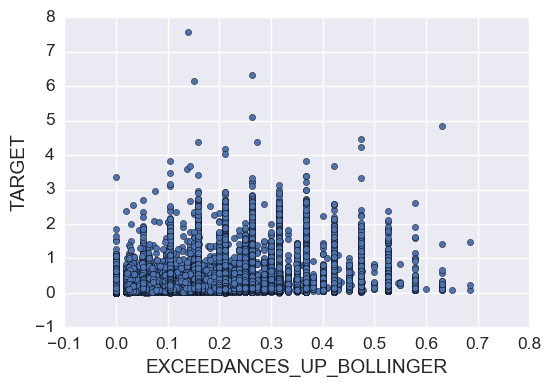

In [417]:
data.plot.scatter(x = 'EXCEEDANCES_UP_BOLLINGER',y = 'TARGET');

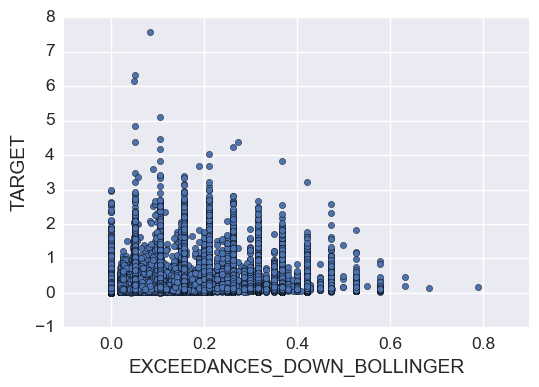

In [418]:
data.plot.scatter(x = 'EXCEEDANCES_DOWN_BOLLINGER',y = 'TARGET');

In [938]:
data['UP_TREND_RETURNS'] = (data['TREND_RETURNS'] >= data['TREND_RETURNS'].std())*1
data['DOWN_TREND_RETURNS'] = (data['TREND_RETURNS'] <= -data['TREND_RETURNS'].std())*1
data['NO_TREND_RETURNS'] = (data['TREND_RETURNS'] <= data['TREND_RETURNS'].std())*1 - (data['TREND_RETURNS'] <= -data['TREND_RETURNS'].std())*1

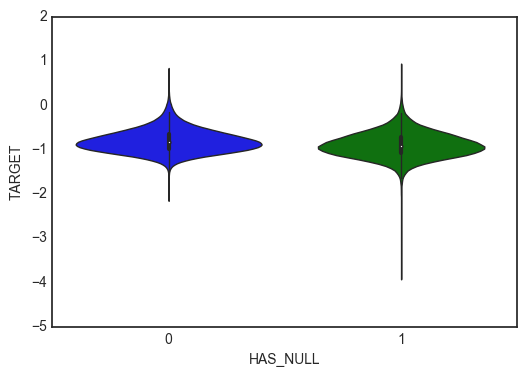

In [894]:
ax = sns.violinplot(x =data['HAS_NULL'] ,y = np.log10(data['TARGET']));

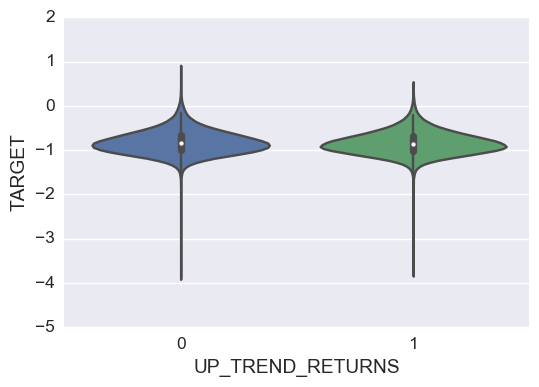

In [425]:
ax = sns.violinplot(x =data['UP_TREND_RETURNS'] ,y = np.log10(data['TARGET']));

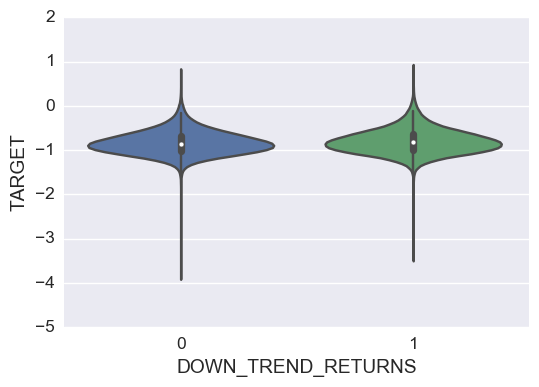

In [426]:
ax = sns.violinplot(x =data['DOWN_TREND_RETURNS'] ,y = np.log10(data['TARGET']));

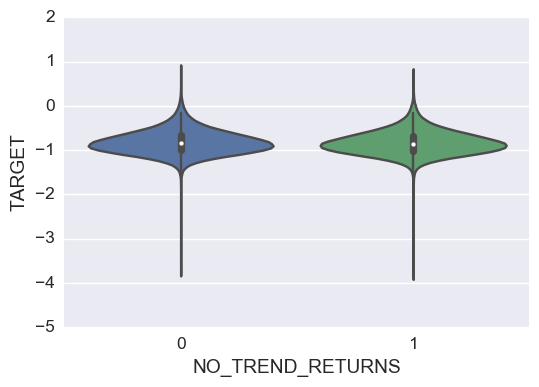

In [429]:
ax = sns.violinplot(x =data['NO_TREND_RETURNS'] ,y = np.log10(data['TARGET']));

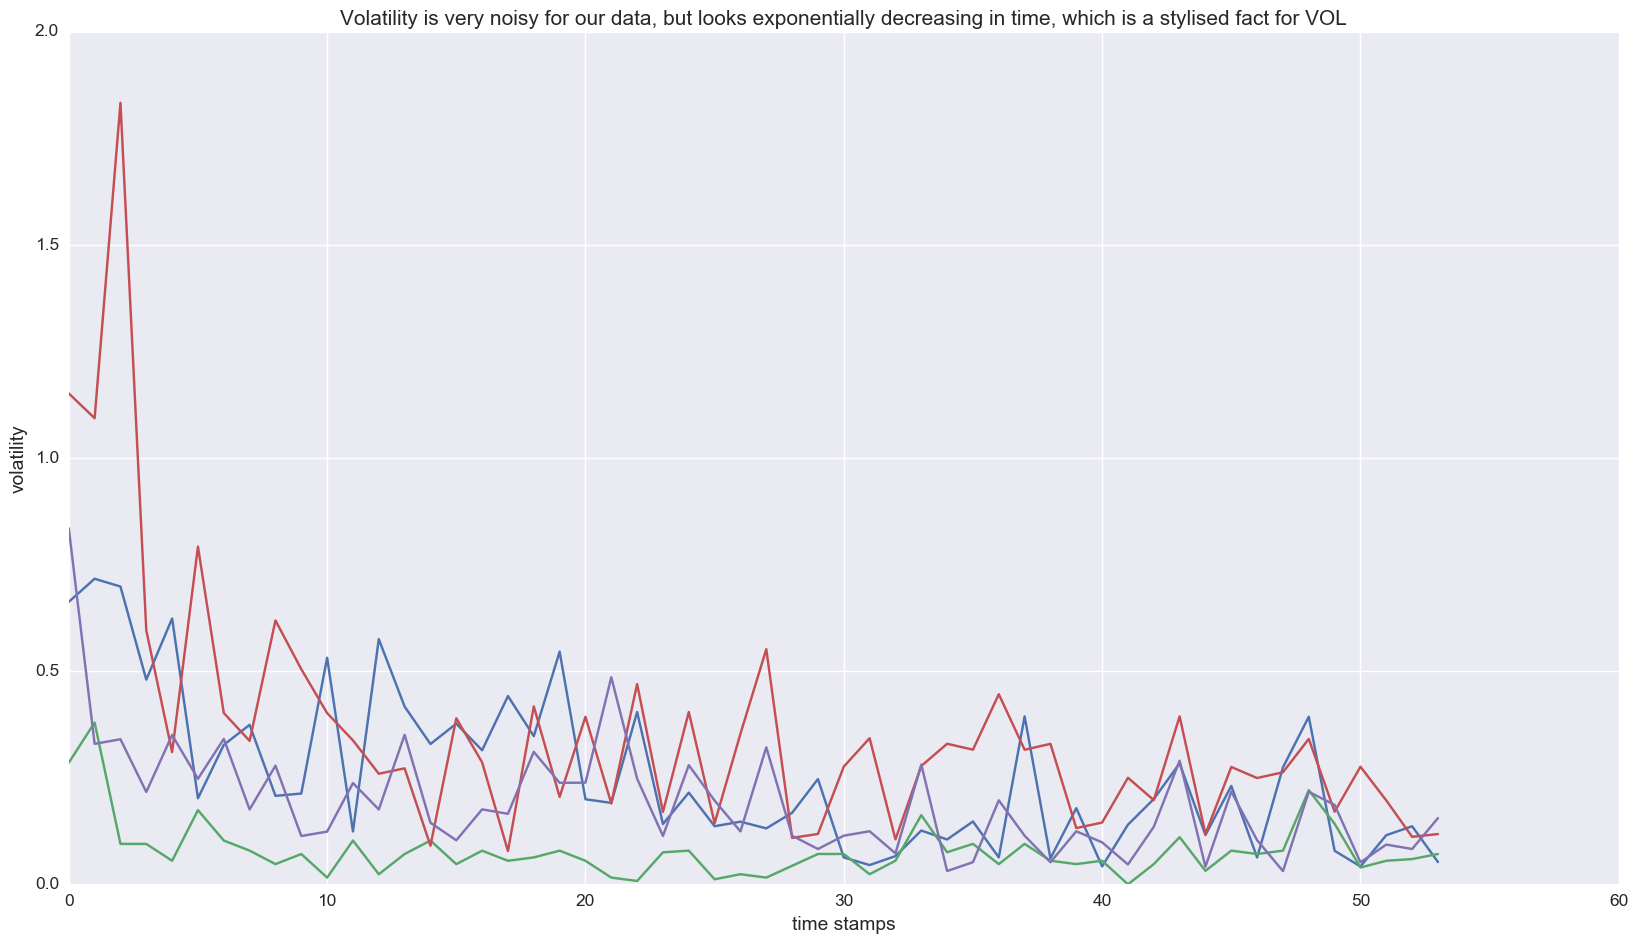

In [35]:
plt.clf()
plt.subplots(figsize=(20, 11))
plt.title('Volatility is very noisy for our data, but looks exponentially decreasing in time, which is a stylised fact for VOL')
plt.plot(data[keys_volatility].values[0,:])
plt.plot(data[keys_volatility].values[1,:])
plt.plot(data[keys_volatility].values[2,:])
plt.plot(data[keys_volatility].values[3,:])
plt.ylabel('volatility')
plt.xlabel('time stamps')
plt.show()

In [64]:
example_Y = data[keys_volatility].values[0,:]
example_X = np.linspace(0,1,num = example_Y.shape[0])

coef = np.polyfit(example_X, np.log(example_Y), 1)
fit = np.exp(coef[1]+example_X*coef[0])

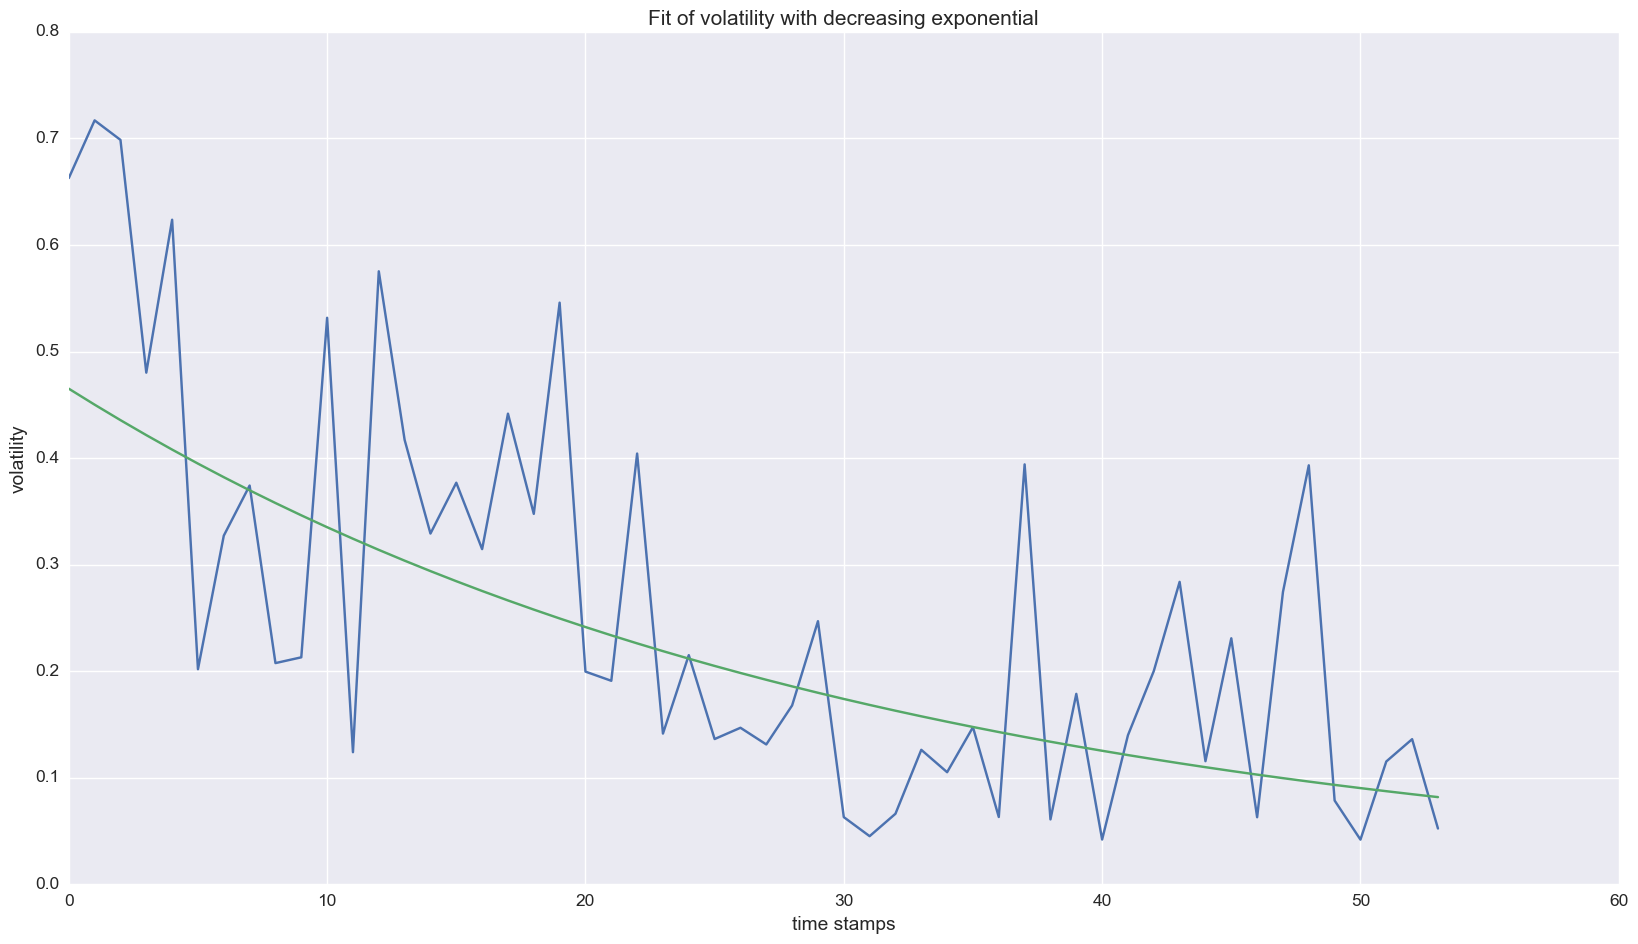

In [67]:
plt.clf()
plt.subplots(figsize=(20, 11))
plt.title('Fit of volatility with decreasing exponential')
plt.plot(data[keys_volatility].values[0,:])
plt.plot(fit)
plt.ylabel('volatility')
plt.xlabel('time stamps')
plt.show()

In [70]:
data[keys_volatility].values[1,:]+1e-6

array([  2.85395112e-01,   3.79560681e-01,   9.48588196e-02,
         9.47946831e-02,   5.53160153e-02,   1.73995295e-01,
         1.02746259e-01,   7.91027024e-02,   4.74459602e-02,
         7.11203054e-02,   1.57999472e-02,   1.02746259e-01,
         2.37074351e-02,   7.11203054e-02,   1.02659451e-01,
         4.73578172e-02,   7.89290287e-02,   5.52319641e-02,
         6.31434229e-02,   7.89690395e-02,   5.52692886e-02,
         1.57919396e-02,   7.89513611e-03,   7.50333162e-02,
         7.90491830e-02,   1.18582274e-02,   2.37194668e-02,
         1.58133112e-02,   4.34995737e-02,   7.12226700e-02,
         7.11925322e-02,   2.37355281e-02,   5.53721917e-02,
         1.62351849e-01,   7.52750276e-02,   9.50034444e-02,
         4.74941766e-02,   9.49391123e-02,   5.53909425e-02,
         4.74700562e-02,   5.53628210e-02,   1.00000000e-06,
         4.74539895e-02,   1.10687178e-01,   3.16309735e-02,
         7.90491830e-02,   7.11203054e-02,   7.89957359e-02,
         2.20850283e-01,

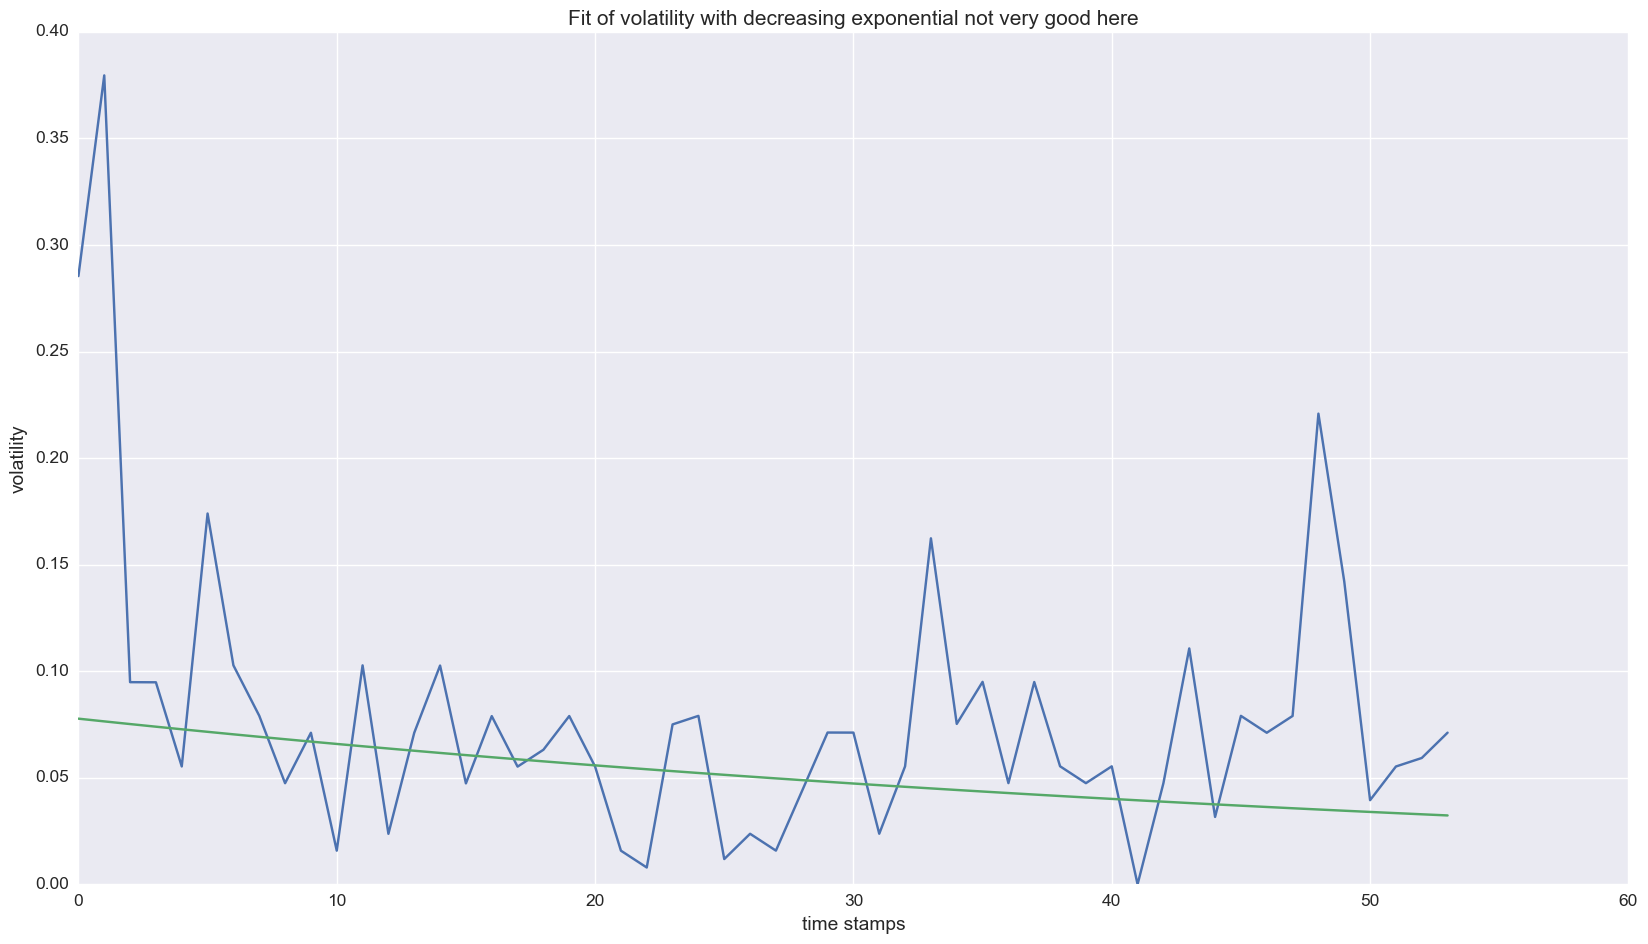

In [72]:
example_Y = data[keys_volatility].values[1,:]+1e-6
example_X = np.linspace(0,1,num = example_Y.shape[0])

coef = np.polyfit(example_X, np.log(example_Y), 1)
fit = np.exp(coef[1]+example_X*coef[0])


plt.clf()
plt.subplots(figsize=(20, 11))
plt.title('Fit of volatility with decreasing exponential not very good here')
plt.plot(example_Y)
plt.plot(fit)
plt.ylabel('volatility')
plt.xlabel('time stamps')
plt.show()

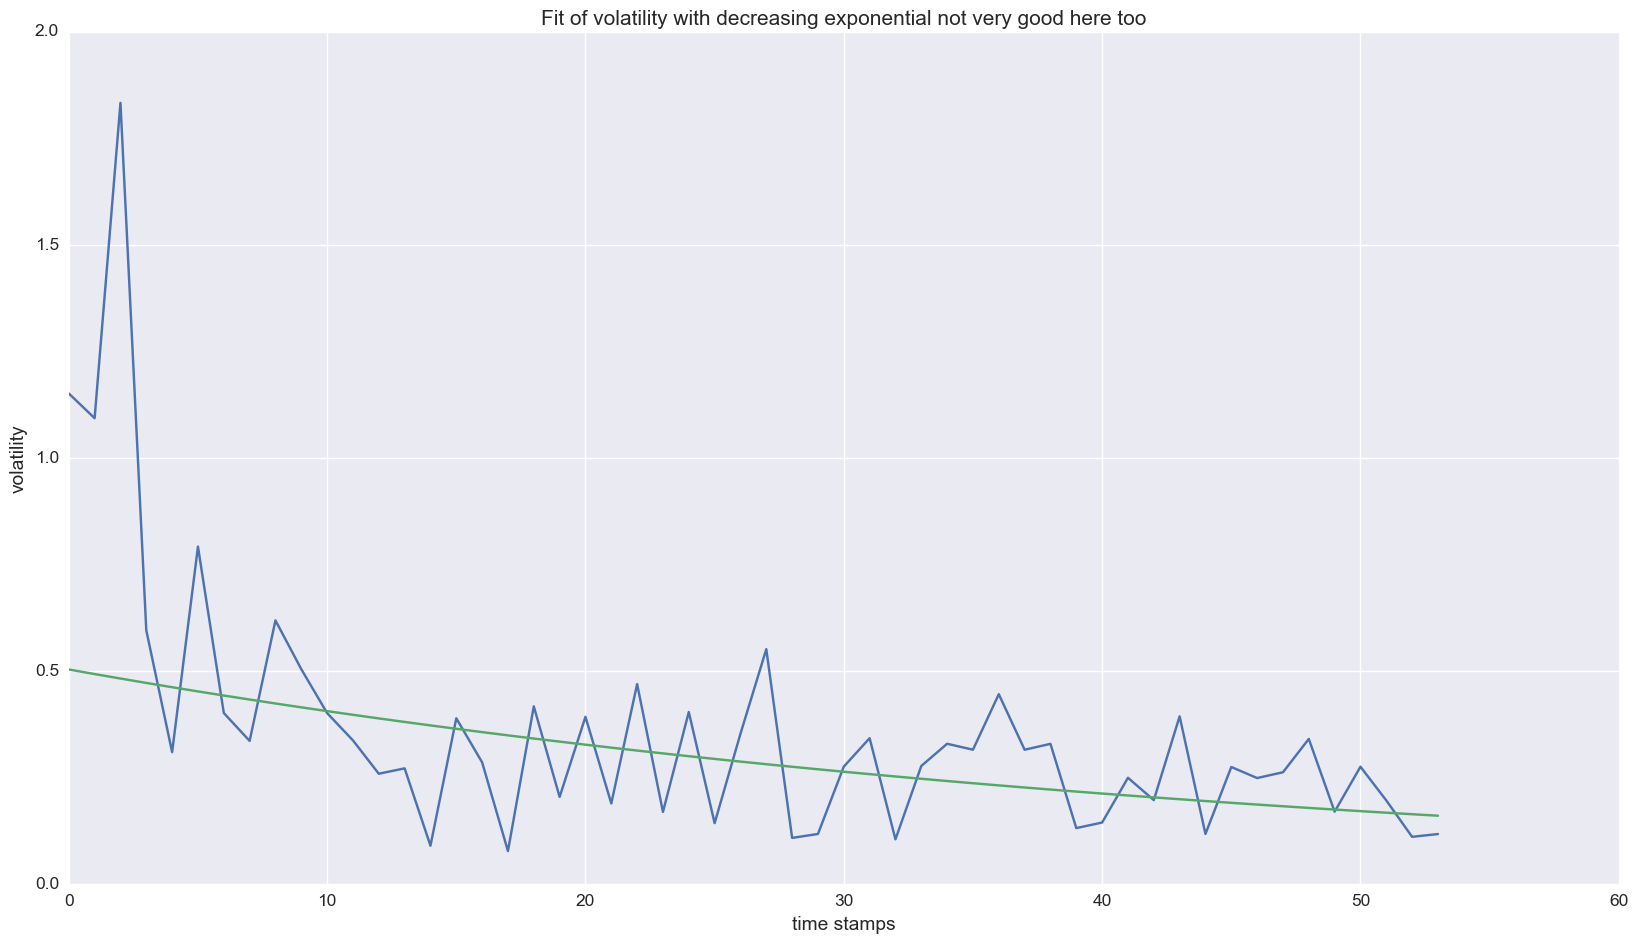

In [74]:
example_Y = data[keys_volatility].values[2,:]
example_X = np.linspace(0,1,num = example_Y.shape[0])

coef = np.polyfit(example_X, np.log(example_Y), 1)
fit = np.exp(coef[1]+example_X*coef[0])


plt.clf()
plt.subplots(figsize=(20, 11))
plt.title('Fit of volatility with decreasing exponential not very good here too')
plt.plot(example_Y)
plt.plot(fit)
plt.ylabel('volatility')
plt.xlabel('time stamps')
plt.show()

We can examine the robustness of the method by keeping track of the error made by the fit and the coefficients found.

In [88]:
coefs = np.array([[]])
errors = np.array([])

for k in range(100):
    example_Y = data[keys_volatility].dropna().values[k,:]+1e-3
    example_X = np.linspace(0,1,num = example_Y.shape[0])

    coef = np.polyfit(example_X, np.log(example_Y), 1)
    fit = np.exp(coef[1]+example_X*coef[0])
    error = np.mean(np.abs((fit - example_Y)))
    
    errors = np.append(errors,error)
    coefs = np.append(coefs,[coef])


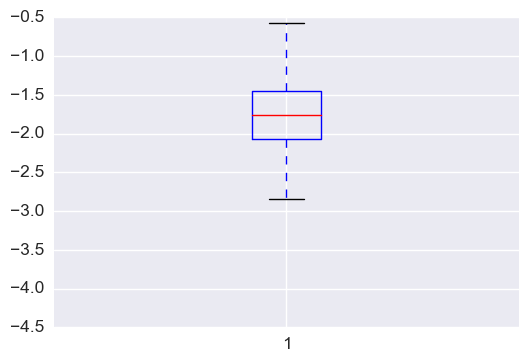

In [97]:
plt.boxplot(coefs[1:100:2])
plt.show()

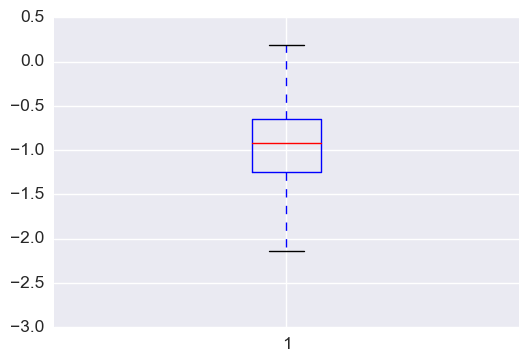

In [96]:
plt.boxplot(coefs[0:100:2])
plt.show()

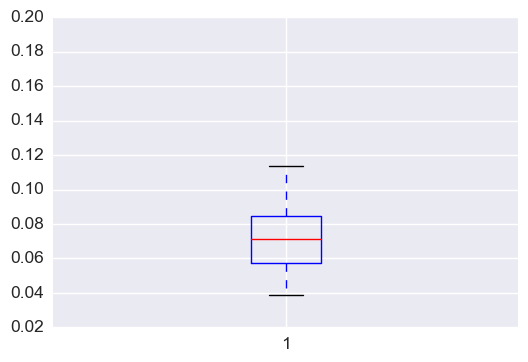

In [89]:
plt.boxplot(errors)
plt.show()

In [120]:
values_fit = pd.DataFrame()

copy_data = data[keys_volatility]
copy_data = copy_data.fillna(copy_data.median())

for k in range(copy_data.shape[0]):
    example_Y = copy_data.values[k,:]+1e-3
    example_X = np.linspace(0,1,num = example_Y.shape[0])

    coef = np.polyfit(example_X, np.log(example_Y), 1)
    fit = np.exp(coef[1]+example_X*coef[0])
    error = np.mean(np.abs((fit - example_Y)))
    
    add = pd.DataFrame(fit).T
    add['COEFFICIENT_EXPONENTIAL_A'] = [coef[1]]
    add['COEFFICIENT_EXPONENTIAL_B'] = [coef[0]]
    add['ERROR_FIT_EXPONENTIAL'] = [error]
    
    values_fit = pd.concat([values_fit,add])

In [943]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

y = (data["TARGET"] <= 0.05)*1

copy = data.copy()

del copy['TARGET']

X = copy

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

clf = XGBClassifier(booster = 'gbtree',n_jobs = 5)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99    498603
          1       0.57      0.09      0.16     10448

avg / total       0.97      0.98      0.97    509051

[[497876    727]
 [  9492    956]]


In [947]:
feat_imp = pd.Series(clf.feature_importances_)
feat_imp.index = copy.columns
feat_imp = feat_imp.sort_values(ascending=False)
feat_imp[0:50]

ERROR_FIT_EXPONENTIAL         0.162084
STD_RETURNS                   0.143271
31                            0.039074
29                            0.034732
P5_STD_RETURNS                0.033285
volatility 13:55:00           0.030391
27                            0.024602
volatility 13:40:00           0.021708
volatility 13:35:00           0.020260
26                            0.018813
volatility 13:50:00           0.018813
volatility 13:30:00           0.018813
38                            0.015919
33                            0.013025
23                            0.013025
volatility 13:10:00           0.011577
volatility 12:50:00           0.010130
volatility 12:45:00           0.010130
volatility 10:10:00           0.010130
ID                            0.010130
36                            0.008683
volatility 10:55:00           0.008683
volatility 11:35:00           0.008683
39                            0.008683
EXCEEDANCES_UP_BOLLINGER      0.008683
28                       

In [939]:
# Add exponential fit to data

for column in values_fit.columns:
    data[column] = values_fit[column].values

In [941]:
data.columns

Index([                       'ID',                      'date',
                      'product_id',       'volatility 09:30:00',
             'volatility 09:35:00',       'volatility 09:40:00',
             'volatility 09:45:00',       'volatility 09:50:00',
             'volatility 09:55:00',       'volatility 10:00:00',
       ...
                                47,                          48,
                                49,                          50,
                                51,                          52,
                                53, 'COEFFICIENT_EXPONENTIAL_A',
       'COEFFICIENT_EXPONENTIAL_B',     'ERROR_FIT_EXPONENTIAL'],
      dtype='object', length=223)

The error of the exponential fit is very important. The coefficient b of the exponential fit is also important. Some of the other values are important as well but nothing significant.

Now we try rough volatility.

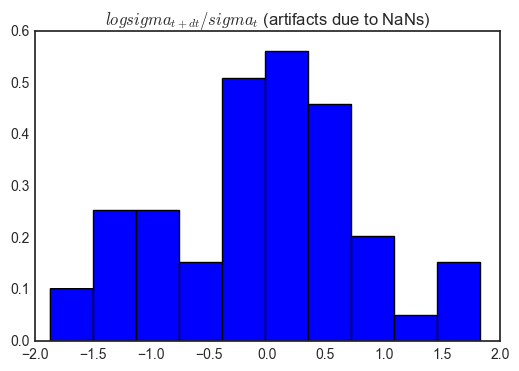

0.134167821452


In [38]:
date = 0

plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data[keys_volatility]+1e-6).diff(axis = 1).dropna(axis = 1).values[date,:]
plt.hist(data_exploitation,bins = 10,normed = True)
plt.show()
print(data['TARGET'][date])

In [37]:
data['TARGET'][0]

0.13416782145199999

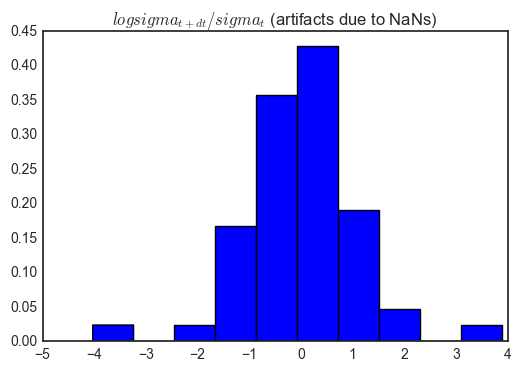

0.0461261792996


In [40]:
date = 1

plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1).dropna(axis = 1).values[date,:]
plt.hist(data_exploitation,bins = 10,normed = True)
plt.show()
print(data['TARGET'][date])

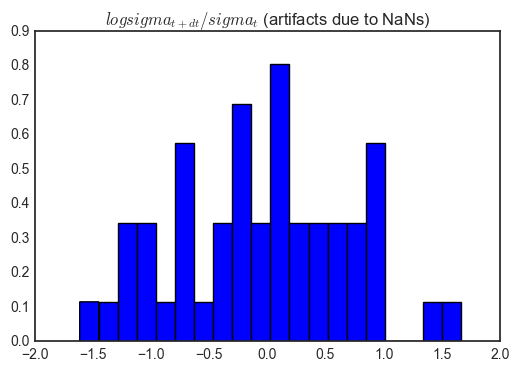

0.144312438235


In [44]:
date = 2

plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1).dropna(axis = 1).values[date,:]
plt.hist(data_exploitation,bins =20,normed = True)
plt.show()
print(data['TARGET'][date])

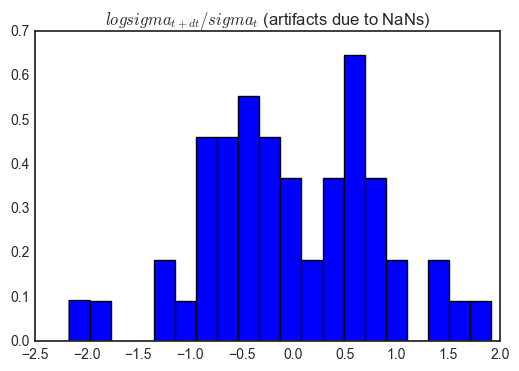

0.130175677785


In [43]:
date = 3

plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1).dropna(axis = 1).values[date,:]
plt.hist(data_exploitation,bins = 20,normed = True)
plt.show()
print(data['TARGET'][date])

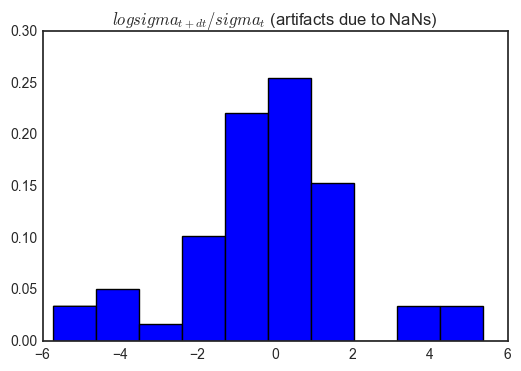

0.0858725674442


In [46]:
date = 4

plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1).dropna(axis = 1).values[date,:]
plt.hist(data_exploitation,bins = 10,normed = True)
plt.show()
print(data['TARGET'][date])

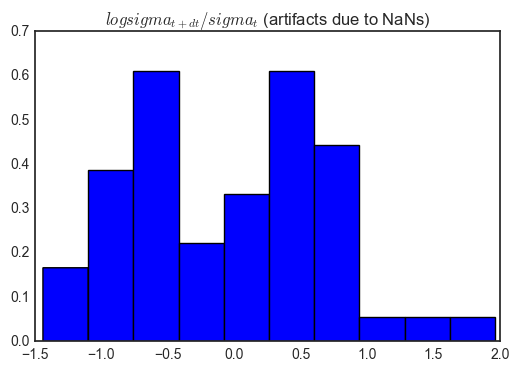

0.122723941626


In [49]:
date = 5

plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1).dropna(axis = 1).values[date,:]
plt.hist(data_exploitation,bins = 10,normed = True)
plt.show()
print(data['TARGET'][date])

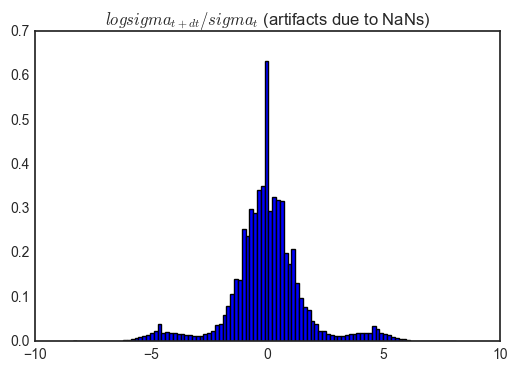

In [51]:
plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data.loc[data['TARGET'] <= 0.1][keys_volatility]+1e-3).diff(axis = 1).dropna(axis = 1)
reshape_data = data_exploitation.values.reshape(data_exploitation.shape[0]*data_exploitation.shape[1])
plt.hist(reshape_data,bins = 100,normed = True)
plt.show()

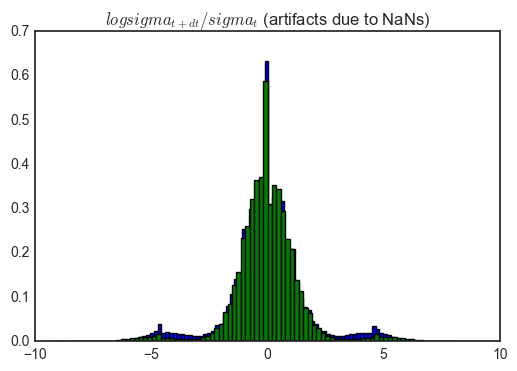

In [61]:
plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data.loc[data['TARGET'] <= 0.1][keys_volatility]+1e-3).diff(axis = 1).dropna(axis = 1)
reshape_data = data_exploitation.values.reshape(data_exploitation.shape[0]*data_exploitation.shape[1])
plt.hist(reshape_data,bins = 100,normed = True)
data_exploitation = np.log(data.loc[data['TARGET'] >= 0.1][keys_volatility]+1e-3).diff(axis = 1).dropna(axis = 1)
reshape_data = data_exploitation.values.reshape(data_exploitation.shape[0]*data_exploitation.shape[1])
plt.hist(reshape_data,bins = 100,normed = True)
plt.show()

# It seems that the close the shape of the distribution to a normal, the lower the volatiliy. We should add that as a variable. But we also have that the artifacts are overhwelimingly more present in data with low vol. We look at the distribution of vol in cases where there is data missing.

In [77]:
has_nill = (data[keys_volatility] <= 0.001).any(axis = 1)*1

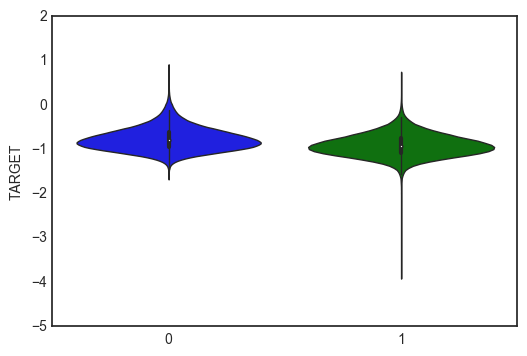

In [78]:
sns.violinplot(has_nill,np.log10(data['TARGET']))
plt.show()

So it is present on NAs but it is not enough. Let us look at the rough vol transformation instead.

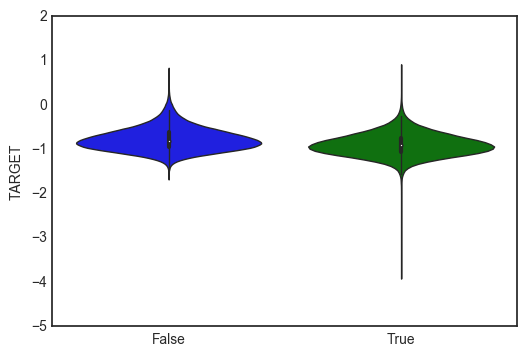

In [87]:
data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1)
has_rough = (np.max(data_exploitation,axis = 1) >= 3.0)

sns.violinplot(has_rough,np.log10(data['TARGET']))
plt.show()

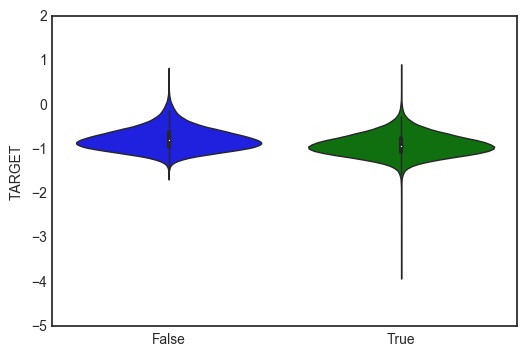

In [89]:
data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1)
has_rough = (np.min(data_exploitation,axis = 1) <= -3.0)

sns.violinplot(has_rough,np.log10(data['TARGET']))
plt.show()

In [90]:
data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1)
has_rough = (np.min(data_exploitation,axis = 1) <= -3.0)*1
data['HAS_ROUGH_BELOW'] = has_rough

data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1)
has_rough = (np.max(data_exploitation,axis = 1) >= 3.0)*1
data['HAS_ROUGH_ABOVE'] = has_rough



In [852]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

copy_data = data.copy()
copy_data = copy_data

y = (1*(copy_data["TARGET"] <= 0.05)*1).values

del copy_data['TARGET']
del copy_data['ID']
del copy_data['date']


X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

clf = XGBClassifier(n_jobs = 5,eta = 0.3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99    498603
          1       0.56      0.09      0.16     10448

avg / total       0.97      0.98      0.97    509051

[[497836    767]
 [  9458    990]]


In [161]:
feat_imp = pd.Series(clf.feature_importances_)
feat_imp.index = copy_data.columns
feat_imp = feat_imp.sort_values(ascending=False)


In [162]:
print(feat_imp[0:70])

ERROR_FIT_EXPONENTIAL       0.137143
STD_RETURNS                 0.062857
P5_STD_RETURNS              0.057143
32                          0.044286
volatility 13:55:00         0.041429
35                          0.040000
volatility 13:45:00         0.028571
volatility 09:30:00         0.028571
volatility 13:50:00         0.025714
34                          0.022857
volatility 13:40:00         0.021429
36                          0.021429
30                          0.020000
31                          0.018571
volatility 13:30:00         0.017143
28                          0.015714
27                          0.014286
volatility 12:55:00         0.014286
volatility 13:35:00         0.012857
P3_TREND_VOLATILITY         0.011429
33                          0.011429
volatility 13:20:00         0.010000
38                          0.010000
40                          0.010000
volatility 13:25:00         0.010000
HIGH_POINT_VOLATILITY       0.010000
37                          0.008571
4

In [953]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

copy_data = data.copy()
copy_data = copy_data

y = copy_data["TARGET"].values

del copy_data['TARGET']
del copy_data['ID']
del copy_data['date']


X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = XGBRegressor(n_jobs = 5,eta = 0.3)

model.fit(X_train,y_train)


y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.27089240421915867

In [958]:
feat_imp = pd.Series(model.feature_importances_)
feat_imp.index = copy_data.columns
feat_imp = feat_imp.sort_values(ascending=False)

print(feat_imp[0:70])
feat_imp['HAS_NULL']

ERROR_FIT_EXPONENTIAL       0.094752
volatility 13:55:00         0.055394
volatility 13:50:00         0.051020
volatility 13:45:00         0.034985
volatility 13:10:00         0.029155
volatility 13:30:00         0.026239
STD_RETURNS                 0.026239
P5_STD_RETURNS              0.020408
HIGH_POINT_VOLATILITY       0.020408
34                          0.018950
volatility 10:45:00         0.018950
volatility 12:40:00         0.018950
volatility 13:35:00         0.018950
33                          0.018950
volatility 12:10:00         0.017493
product_id                  0.014577
TREND_VOLATILITY            0.013120
35                          0.013120
volatility 11:40:00         0.013120
volatility 13:40:00         0.013120
31                          0.013120
volatility 12:30:00         0.013120
P3_TREND_VOLATILITY         0.011662
volatility 11:55:00         0.011662
volatility 11:15:00         0.011662
37                          0.011662
volatility 09:30:00         0.010204
v

0.0

In [955]:
feat_imp[0:50].index.values

array(['ERROR_FIT_EXPONENTIAL', 'volatility 13:55:00',
       'volatility 13:50:00', 'volatility 13:45:00', 'volatility 13:10:00',
       'volatility 13:30:00', 'STD_RETURNS', 'P5_STD_RETURNS',
       'HIGH_POINT_VOLATILITY', 34, 'volatility 10:45:00',
       'volatility 12:40:00', 'volatility 13:35:00', 33,
       'volatility 12:10:00', 'product_id', 'TREND_VOLATILITY', 35,
       'volatility 11:40:00', 'volatility 13:40:00', 31,
       'volatility 12:30:00', 'P3_TREND_VOLATILITY', 'volatility 11:55:00',
       'volatility 11:15:00', 37, 'volatility 09:30:00',
       'volatility 13:20:00', 'volatility 09:55:00', 'TREND_RETURNS',
       'volatility 10:40:00', 'volatility 12:45:00', 0,
       'volatility 09:40:00', 'P1_TREND_VOLATILITY', 'volatility 10:15:00',
       30, 36, 28, 'LOW_POINT_VOLATILITY', 'volatility 11:10:00',
       'volatility 09:45:00', 'P2_TREND_VOLATILITY', 'volatility 13:05:00',
       'volatility 09:50:00', 'volatility 10:00:00', 'volatility 12:25:00',
       'vola

In [957]:
feat_imp[0:100].index.values

array(['ERROR_FIT_EXPONENTIAL', 'volatility 13:55:00',
       'volatility 13:50:00', 'volatility 13:45:00', 'volatility 13:10:00',
       'volatility 13:30:00', 'STD_RETURNS', 'P5_STD_RETURNS',
       'HIGH_POINT_VOLATILITY', 34, 'volatility 10:45:00',
       'volatility 12:40:00', 'volatility 13:35:00', 33,
       'volatility 12:10:00', 'product_id', 'TREND_VOLATILITY', 35,
       'volatility 11:40:00', 'volatility 13:40:00', 31,
       'volatility 12:30:00', 'P3_TREND_VOLATILITY', 'volatility 11:55:00',
       'volatility 11:15:00', 37, 'volatility 09:30:00',
       'volatility 13:20:00', 'volatility 09:55:00', 'TREND_RETURNS',
       'volatility 10:40:00', 'volatility 12:45:00', 0,
       'volatility 09:40:00', 'P1_TREND_VOLATILITY', 'volatility 10:15:00',
       30, 36, 28, 'LOW_POINT_VOLATILITY', 'volatility 11:10:00',
       'volatility 09:45:00', 'P2_TREND_VOLATILITY', 'volatility 13:05:00',
       'volatility 09:50:00', 'volatility 10:00:00', 'volatility 12:25:00',
       'vola

In [959]:
data[list(feat_imp[0:30].index.values)+['TARGET']].to_csv('feature_engineered_30.csv',sep = ';',index = False)

In [960]:
data[list(feat_imp[0:50].index.values)+['TARGET']].to_csv('feature_engineered_50.csv',sep = ';',index = False)

In [961]:
data[list(feat_imp[0:70].index.values)+['TARGET']].to_csv('feature_engineered_70.csv',sep = ';',index = False)

In [851]:
from sklearn.linear_model import LogisticRegression

copy_data = data[feat_imp[0:70].index].copy()
copy_data = copy_data.replace(np.inf,100.0)
copy_data = copy_data.replace(-np.inf,-100.0)
copy_data = copy_data.fillna(copy_data.median())


y = ((data["TARGET"] <= 0.05)*1).values

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = LogisticRegression()

model.fit(X_train,y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99    498603
          1       0.53      0.07      0.13     10448

avg / total       0.97      0.98      0.97    509051

[[497910    693]
 [  9672    776]]


In [152]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

copy_data = data[feat_imp[0:70].index].copy()
copy_data = copy_data.replace(np.inf,100.0)
copy_data = copy_data.replace(-np.inf,-100.0)
copy_data = copy_data.fillna(copy_data.median())

y = ((data["TARGET"] <= 0.1)*1).values

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = LinearSVC(C = 1e1)

model.fit(X_train,y_train)

LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [153]:

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.75      1.00      0.85    376692
          1       0.81      0.04      0.08    132359

avg / total       0.76      0.75      0.65    509051

[[375330   1362]
 [126450   5909]]


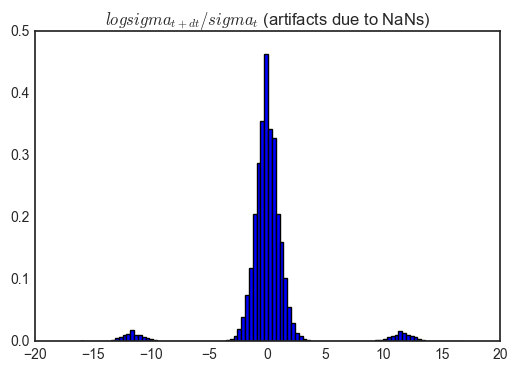

In [27]:
plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data[keys_volatility]+1e-6).diff(axis = 1).dropna(axis = 1)
reshape_data = data_exploitation.values.reshape(data_exploitation.shape[0]*data_exploitation.shape[1])
plt.hist(reshape_data,bins = 100,normed = True)
plt.show()

In [28]:
np.mean(reshape_data)

-0.026490560238342717

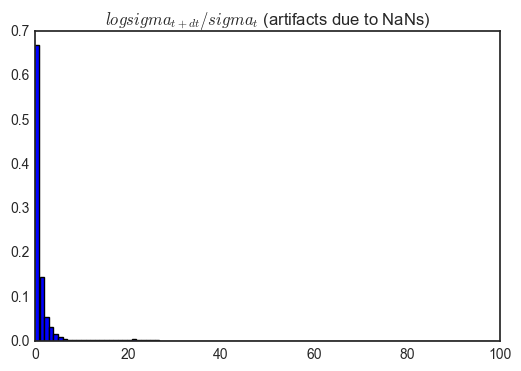

In [22]:
plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1).dropna(axis = 1)
reshape_data = np.power(data_exploitation.values.reshape(data_exploitation.shape[0]*data_exploitation.shape[1]),2)
plt.hist(reshape_data,bins = 100,normed = True)
plt.show()

# Now we will try adding features that correspond to interconnectedness.

In [469]:
features = feat_imp[0:2].index.values

In [470]:
groups = data.groupby(by = 'product_id').groups

In [471]:
features_date = np.append(features,['date'])

In [472]:
features_date

array(['ERROR_FIT_EXPONENTIAL', 'volatility 13:55:00', 'date'], dtype=object)

In [473]:
fuse = pd.merge(data[features_date].iloc[groups[1]],data[features_date].iloc[groups[2]],how = 'outer',on = 'date',suffixes = ('_1','_2'))

In [474]:
for key in groups.keys():
    if key >=3:
        fuse = pd.merge(fuse,data[features_date].iloc[groups[key]],how = 'outer',on = 'date',suffixes = ('','_'+str(key)))

In [475]:
targets = pd.merge(data[['TARGET','date']].iloc[groups[1]],data[['TARGET','date']].iloc[groups[2]],how = 'outer',on = 'date',suffixes = ('_1','_2'))

In [476]:
for key in groups.keys():
    if key >=3:
        targets =  pd.merge(targets,data[['TARGET','date']].iloc[groups[key]],how = 'outer',on = 'date',suffixes =('','_'+str(key)))

In [477]:
fuse.head()

ERROR_FIT_EXPONENTIAL_1  volatility 13:55:00_1  date  \
0                 0.105259               0.052386     1   
1                 0.166250               0.265631     2   
2                 0.285531               0.562614     3   
3                 0.074438               0.076487     4   
4                 0.057448               0.110972     5   

   ERROR_FIT_EXPONENTIAL_2  volatility 13:55:00_2  ERROR_FIT_EXPONENTIAL  \
0                 0.038854               0.071155               0.150655   
1                 0.102987               0.099041               0.132770   
2                 0.228311               0.459672               0.337783   
3                 0.165104               0.492361               0.135739   
4                 0.097051               0.084116               0.106028   

   volatility 13:55:00  ERROR_FIT_EXPONENTIAL_4  volatility 13:55:00_4  \
0             0.117980                 0.077895               0.155294   
1             0.322804                 0.152166               0.353683   
2             1.086821                 0.316474               0.555078   
3             0.071403                 0.072992               0.049163   
4             0.105150                 0.093451               0.218009   

   ERROR_FIT_EXPONENTIAL_5           ...             \
0                 0.071397           ...              
1                 0.142846           ...              
2                 0.247793           ...              
3                 0.090097           ...              
4                 0.074757           ...              

   ERROR_FIT_EXPONENTIAL_314  volatility 13:55:00_314  \
0                   0.186464                 0.326046   
1                   0.189622                 0.297439   
2                   0.297551                 0.369701   
3                        NaN                      NaN   
4                   0.070911                 0.042478   

   ERROR_FIT_EXPONENTIAL_315  volatility 13:55:00_315  \
0                   0.061974                 0.112457   
1                   0.072067                 0.128600   
2                   0.214876                 0.639472   
3                   0.056673                 0.000000   
4                   0.094203                 0.179415   

   ERROR_FIT_EXPONENTIAL_316  volatility 13:55:00_316  \
0                   0.088067                 0.124321   
1                   0.109289                 0.155654   
2                   0.230364                 0.361317   
3                   0.196759                 0.495206   
4                   0.058388                 0.173259   

   ERROR_FIT_EXPONENTIAL_317  volatility 13:55:00_317  \
0                   0.152228                 0.219405   
1                   0.138471                 0.343872   
2                   0.258285                 0.842463   
3                        NaN                      NaN   
4                   0.087125                 0.000000   

   ERROR_FIT_EXPONENTIAL_318  volatility 13:55:00_318  
0                   0.060186                 0.085202  
1                   0.065274                 0.219727  
2                   0.120804                 0.261161  
3                   0.095489                 0.052490  
4                   0.044727                 0.041565  

[5 rows x 637 columns]

In [788]:
from sklearn.linear_model import LogisticRegression

y = ((targets['TARGET_1'])).values

copy = fuse.copy()

del copy['date']

X = copy.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

model = XGBRegressor(booster = 'gbtree',n_jobs = 5)

model.fit(X_train,y_train)


y_pred = model.predict(X_test)-0.02
np.mean(np.abs(y_pred - y_test)/(y_test))

0.20781541679691784

In [789]:
temp = pd.Series(model.feature_importances_ )
temp.index = copy.columns
temp = temp.sort_values(ascending = False)
temp

ERROR_FIT_EXPONENTIAL_1      0.043011
PREDICTIONS_1                0.043011
volatility 13:55:00_2        0.016897
volatility 13:55:00_1        0.010753
PREDICTIONS_4                0.009217
volatility 13:55:00_81       0.009217
ERROR_FIT_EXPONENTIAL_19     0.009217
volatility 13:55:00_230      0.009217
ERROR_FIT_EXPONENTIAL_68     0.007680
PREDICTIONS_209              0.007680
volatility 13:55:00_283      0.007680
volatility 13:55:00_216      0.007680
volatility 13:55:00_273      0.007680
PREDICTIONS_293              0.007680
ERROR_FIT_EXPONENTIAL_122    0.006144
ERROR_FIT_EXPONENTIAL_278    0.006144
volatility 13:55:00_266      0.006144
PREDICTIONS_33               0.006144
volatility 13:55:00_304      0.006144
PREDICTIONS_301              0.006144
PREDICTIONS_278              0.006144
PREDICTIONS_78               0.006144
volatility 13:55:00_282      0.006144
ERROR_FIT_EXPONENTIAL_14     0.006144
volatility 13:55:00_58       0.006144
volatility 13:55:00_50       0.006144
PREDICTIONS_

In [790]:
from sklearn.linear_model import LogisticRegression

y = ((targets['TARGET_2'])).values

copy = fuse.copy()

del copy['date']

X = copy.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

model = XGBRegressor(booster = 'gbtree',n_jobs = 5)

model.fit(X_train,y_train)


y_pred = model.predict(X_test)-0.02
np.mean(np.abs(y_pred - y_test)/(y_test))

0.21439187250084679

In [791]:
from sklearn.linear_model import LogisticRegression

y = ((targets['TARGET'])).values
copy = fuse.copy()

del copy['date']

X = copy.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

model = XGBRegressor(booster = 'gbtree',n_jobs = 5)

model.fit(X_train,y_train)


y_pred = model.predict(X_test)-0.02
np.mean(np.abs(y_pred - y_test)/(y_test))

0.21359674200334183

In [795]:
from sklearn.linear_model import LogisticRegression

y = ((targets['TARGET_4'])).values

copy = fuse.copy()

del copy['date']

X = copy.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

model = XGBRegressor(booster = 'gbtree',n_jobs = 5)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)-0.02
np.mean(np.abs(y_pred - y_test)/(y_test))

0.22475719351423665

In [378]:
fuse[temp.index[0:10]]

ERROR_FIT_EXPONENTIAL_1  ERROR_FIT_EXPONENTIAL_4  volatility 13:55:00_1  \
0                    0.105259                 0.077895               0.052386   
1                    0.166250                 0.152166               0.265631   
2                    0.285531                 0.316474               0.562614   
3                    0.074438                 0.072992               0.076487   
4                    0.057448                 0.093451               0.110972   
5                    0.041785                 0.061226               0.039755   
6                    0.093978                 0.132920               0.206112   
7                    0.054018                 0.047587               0.058396   
8                    0.122112                 0.135748               0.146755   
9                    0.117160                 0.157261               0.352008   
10                   0.058345                 0.087858               0.041207   
11                   0.218906                 0.231098               0.096957   
12                   0.057192                 0.064328               0.064614   
13                   0.046600                 0.057650               0.107941   
14                   0.221884                 0.134504               0.000000   
15                   0.112401                 0.106972               0.281809   
16                   0.054581                 0.075320               0.144497   
17                   0.079826                 0.101520               0.093002   
18                   0.118670                 0.132391               0.161769   
19                   0.448893                 0.479810               0.351859   
20                   0.054686                 0.052065               0.056006   
21                   0.095203                 0.128996               0.098386   
22                   0.045219                 0.071761               0.140308   
23                   0.128166                 0.119302               0.210799   
24                   0.086442                 0.096675               0.116833   
25                   0.139043                 0.135994               0.028665   
26                   0.142833                 0.137841               0.163403   
27                   0.068848                 0.081484               0.101942   
28                   0.082690                 0.080664               0.039748   
29                   0.178658                 0.226147               0.294990   
...                       ...                      ...                    ...   
2087                 0.090712                 0.071984               0.099046   
2088                 0.140656                 0.271600               0.353085   
2089                 0.108437                 0.117813               0.148674   
2090                 0.051998                 0.087128               0.078521   
2091                 0.205980                 0.279298               0.112610   
2092                 0.057245                 0.058745               0.042687   
2093                 0.168511                 0.181529               0.090110   
2094                 0.051766                 0.069113               0.075956   
2095                 0.050212                 0.050723               0.039235   
2096                 0.122948                 0.130076               0.415100   
2097                 0.062700                 0.056232               0.116833   
2098                 0.053707                 0.055137               0.170767   
2099                 0.232449                 0.323821               0.200899   
2100                 0.147569                 0.174387               0.511960   
2101                 0.168391                 0.364519               0.658215   
2102                 0.086582                 0.075529               0.117009   
2103                 0.057092                 0.061372               0.113706   
2104                 0.028405        

In [372]:
temp = pd.Series(model.feature_importances_ )
temp.index = copy.columns
temp = temp.sort_values(ascending = False)
temp

ERROR_FIT_EXPONENTIAL_1      0.008029
ERROR_FIT_EXPONENTIAL_4      0.007434
volatility 13:55:00_1        0.006839
volatility 13:10:00_309      0.004460
ERROR_FIT_EXPONENTIAL_20     0.004163
volatility 13:45:00_232      0.003866
volatility 13:50:00_1        0.003866
volatility 13:45:00          0.003866
volatility 13:55:00_226      0.003568
volatility 13:45:00_11       0.003568
volatility 13:55:00_118      0.003568
volatility 13:45:00_144      0.003271
volatility 13:10:00_169      0.003271
volatility 13:45:00_9        0.003271
volatility 13:10:00_276      0.003271
volatility 13:45:00_245      0.002974
volatility 13:45:00_143      0.002974
volatility 13:45:00_285      0.002974
volatility 13:50:00_300      0.002974
volatility 13:10:00_81       0.002974
volatility 13:10:00_300      0.002974
volatility 13:45:00_182      0.002974
volatility 13:10:00_4        0.002676
volatility 13:55:00_280      0.002676
volatility 13:10:00_6        0.002676
volatility 13:50:00_285      0.002676
volatility 1

In [479]:
fuse.shape

(2117, 637)

In [478]:
fuse.to_csv('fused_X.csv',sep = ';', index = False)
targets.to_csv('fused_Y.csv',sep = ';', index = False)

# Now, we need to recombine features which are asset specific into the original data

In [234]:
from sklearn.linear_model import LogisticRegression

y = ((list_targets[0] <= 0.1)*1).values

X = list_imgs

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = XGBClassifier(booster = 'gbtree',n_jobs = 5)

model.fit(X_train,y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

IndexError: too many indices for array

In [232]:
list_targets

array([ array([ 0.13416782,  0.04612618,  0.14431244,  0.13017568,  0.08587257,
        0.12272394,  0.15088466,  0.1507026 ,  0.10204839,  0.16372444,
        0.10314912,  0.09938587,  0.18102687,  0.17809244,  0.10190031,
        0.16328866,  0.1063772 ,  0.09569925,  0.108759  ,  0.13403271,
        0.08724501,  0.14777775,  0.2499699 ,  0.09630094,  0.10947703,
        0.10823848,  0.15489119,  0.08247893,  0.07073958,  0.09668169,
        0.25829083,  0.08448447,  0.07201351,  0.18541235,  0.10523932,
        0.09041269,  0.13731367,  0.0574183 ,  0.07092185,  0.07495205,
        0.10035154,  0.0794551 ,  0.14086413,  0.06651942,  0.04423782,
        0.11654086,  0.04888033,  0.07190511,  0.14569197,  0.1337223 ,
        0.08824189,  0.0896911 ,  0.10735215,  0.12546122,  0.11118197,
        0.06806978,  0.08969545,  0.09464005,  0.07172387,  0.12488475,
        0.13786968,  0.11196293,  0.08686866,  0.10475763,  0.08188106,
        0.08453431,  0.11034919,  0.13771058,  0.1072263

In [226]:
data.loc[data['date'] == 1][features_important_single]

ERROR_FIT_EXPONENTIAL  volatility 13:55:00  volatility 13:50:00  \
0                 0.105259             0.052386             0.136218   
1                 0.038854             0.071155             0.059276   
2                 0.150655             0.117980             0.111488   
3                 0.077895             0.155294             0.082934   
4                 0.071397             0.000000             0.112193   
5                 0.079176             0.081571             0.081553   
6                 0.077237             0.072930             0.043758   
7                 0.099942             0.144437             0.256688   
8                 0.066615             0.045695             0.045702   
9                 0.092578             0.210295             0.114941   
10                0.056647             0.052893             0.065094   
11                0.064858             0.036312             0.094411   
12                0.092603             0.177648             0.047445   
13                0.142813             0.145022             0.272180   
14                0.052872             0.048551             0.215808   
15                0.103073             0.118777             0.259389   
16                0.054781             0.046293             0.157445   
17                0.069481             0.104176             0.159713   
18                0.084604             0.124989             0.112701   
19                0.077207             0.120379             0.180903   
20                0.076050             0.044936             0.000000   
21                0.113535             0.081096             0.538521   
22                0.184588             0.099342             0.369096   
23                0.098514             0.134108             0.134236   
24                0.070534             0.048441             0.115025   
25                0.053977             0.022472             0.074929   
26                0.098414             0.101815             0.101879   
27                0.065019             0.049853             0.085410   
28                0.045697             0.091798             0.063892   
29                0.078687             0.019773             0.138440   
..                     ...                  ...                  ...   
288               0.104730             0.048539             0.097038   
289               0.111423             0.048757             0.134116   
290               0.038797             0.051968             0.053358   
291               0.063035             0.012287             0.061416   
292               0.115253             0.195673             0.065270   
293               0.099991             0.082714             0.203090   
294               0.069548             0.104133             0.000000   
295               0.085475             0.104904             0.110411   
296               0.046460             0.112610             0.090045   
297               0.071755             0.084756             0.078291   
298               0.065725             0.158239             0.246474   
299               0.237958             0.204343             0.122875   
300               0.146062             0.026781             0.080344   
301               0.050865             0.113400             0.088271   
302               0.099231             0.093983             0.046968   
303               0.055642             0.077876             0.062280   
304               0.050024             0.057096             0.085622   
305               0.051559             0.043599             0.074104   
306               0.073180             0.039189             0.146991   
307               0.120816             0.044171             0.036809   
308               0.039198             0.025532             0.086808   
309               0.093491             0.181842             0.218465   
310               0.048247             0.100852             0.085301   
311               0.062623             0.2684

In [26]:
np.mean(reshape_data)

2.3663606573322373

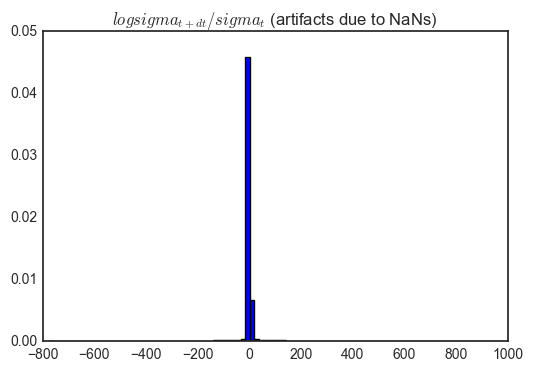

In [29]:
plt.clf()
plt.title(r'$log sigma_{t+dt} / sigma_{t}$ (artifacts due to NaNs)')
data_exploitation = np.log(data[keys_volatility]+1e-3).diff(axis = 1).dropna(axis = 1)
reshape_data = np.power(data_exploitation.values.reshape(data_exploitation.shape[0]*data_exploitation.shape[1]),3)
plt.hist(reshape_data,bins = 100,normed = True)
plt.show()

In [30]:
np.mean(reshape_data)

0.027442869535143105

In [431]:
data.columns

Index(['ID', 'date', 'product_id', 'volatility 09:30:00',
       'volatility 09:35:00', 'volatility 09:40:00', 'volatility 09:45:00',
       'volatility 09:50:00', 'volatility 09:55:00', 'volatility 10:00:00',
       ...
       'NORM volatility 13:45:00', 'NORM volatility 13:50:00',
       'NORM volatility 13:55:00', 'TARGET_CLASS', 'EXCEEDANCES_UP_BOLLINGER',
       'EXDEEDANCES_DOWN_BOLLINGER', 'EXCEEDANCES_DOWN_BOLLINGER',
       'UP_TREND_RETURNS', 'DOWN_TREND_RETURNS', 'NO_TREND_RETURNS'],
      dtype='object', length=221)

In [433]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

copy_data = data.copy()
copy_data = copy_data

y = (1*(copy_data["TARGET"] <= 0.1)*1).values

del copy_data['TARGET']
del copy_data['TARGET_CLASS']
del copy_data['ID']


X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

clf = XGBClassifier(n_jobs = 5)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.91      0.90    235391
          1       0.72      0.66      0.69     82766

avg / total       0.84      0.85      0.84    318157

[[214274  21117]
 [ 27937  54829]]


In [342]:
data['TARGET_CLASS'] = (data['TARGET'] <= 0.1)*1

In [344]:
import xgboost as xgb

def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['TARGET_CLASS'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [345]:
predictors = [x for x in data.columns if x not in ['TARGET', 'ID','date','TARGET_CLASS']]
clf = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(clf, data, predictors)

KeyboardInterrupt: 

In [376]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data
    
y = copy_data["TARGET"].values

del copy_data['TARGET']
del copy_data['TARGET_CLASS']
del copy_data['ID']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = XGBRegressor(booster = 'gbtree',n_jobs = 5)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.27968977668417772

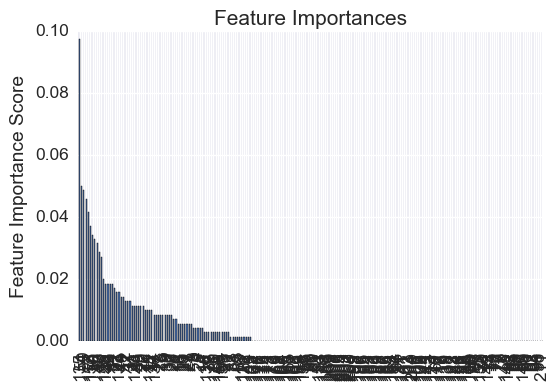

In [377]:
feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [363]:
copy_data.columns

Index(['date', 'product_id', 'volatility 09:30:00', 'volatility 09:35:00',
       'volatility 09:40:00', 'volatility 09:45:00', 'volatility 09:50:00',
       'volatility 09:55:00', 'volatility 10:00:00', 'volatility 10:05:00',
       ...
       'NORM volatility 13:10:00', 'NORM volatility 13:15:00',
       'NORM volatility 13:20:00', 'NORM volatility 13:25:00',
       'NORM volatility 13:30:00', 'NORM volatility 13:35:00',
       'NORM volatility 13:40:00', 'NORM volatility 13:45:00',
       'NORM volatility 13:50:00', 'NORM volatility 13:55:00'],
      dtype='object', length=212)

In [379]:
feat_imp = pd.Series(model.feature_importances_)
feat_imp

0      0.048851
1      0.007184
2      0.012931
3      0.001437
4      0.004310
5      0.008621
6      0.008621
7      0.002874
8      0.004310
9      0.004310
10     0.001437
11     0.010057
12     0.002874
13     0.005747
14     0.004310
15     0.000000
16     0.005747
17     0.008621
18     0.002874
19     0.005747
20     0.010057
21     0.005747
22     0.011494
23     0.002874
24     0.005747
25     0.004310
26     0.007184
27     0.005747
28     0.008621
29     0.005747
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    0.000000
188    0.000000
189    0.000000
190    0.000000
191    0.000000
192    0.000000
193    0.000000
194    0.000000
195    0.000000
196    0.000000
197    0.000000
198    0.000000
199    0.000000
200    0.000000
201    0.000000
202    0.000000
203    0.000000
204    0.000000
205    0.000000
206    0.000000
207    0.000000
208    0.000000
209    0.000000
210    0.000000
211    0.000000
dtype: float32

In [382]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data
    
y = copy_data["TARGET"].values

del copy_data['TARGET']
del copy_data['TARGET_CLASS']
del copy_data['ID']

X = copy_data.values[:,feat_imp >= 0.01]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = XGBRegressor(booster = 'gblinear',n_jobs = 5)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


0.7504186071165323

In [986]:
losses = pd.read_csv('losses_smaller_batches_50.csv')

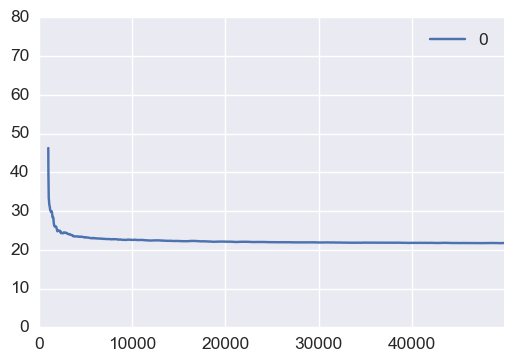

In [987]:
(losses).rolling(window = 1000).mean().plot()
plt.ylim(0.0,80.0)
plt.show()

In [988]:
(losses).rolling(window = 1000).mean()

0
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
...          ...
49870  21.728711
49871  21.727866
49872  21.728081
49873  21.728495
49874  21.728511
49875  21.728985
49876  21.729158
49877  21.729645
49878  21.730344
49879  21.730165
49880  21.730659
49881  21.732251
49882  21.733575
49883  21.734810
49884  21.735280
49885  21.733611
49886  21.734595
49887  21.736543
49888  21.737608
49889  21.737809
49890  21.738842
49891  21.738675
49892  21.738417
49893  21.739288
49894  21.739107
49895  21.738990
49896  21.737657
49897  21.737944
49898  21.738465
49899  21.737453

[49900 rows x 1 columns]

In [212]:
losses.rolling(window = 100).mean()


0
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
...           ...
190214  22.689186
190215  22.704043
190216  22.707137
190217  22.701773
190218  22.695988
190219  22.712449
190220  22.707691
190221  22.701790
190222  22.697487
190223  22.716040
190224  22.703546
190225  22.703620
190226  22.697138
190227  22.699507
190228  22.708986
190229  22.707956
190230  22.710505
190231  22.705943
190232  22.718746
190233  22.700838
190234  22.706321
190235  22.700256
190236  22.692572
190237  22.686584
190238  22.684335
190239  22.700231
190240  22.710426
190241  22.718100
190242  22.681876
190243  22.672184

[190244 rows x 1 columns]

# Augment with predictions

In [1004]:
predictions = pd.read_csv('PREDICTIONS.csv',sep = ';',header = None)

In [1005]:
predictions

0
0       0.000000
1       0.170263
2       0.220565
3       0.126190
4       0.087237
5       0.109875
6       0.142853
7       0.153108
8       0.105085
9       0.160974
10      0.105578
11      0.108528
12      0.151956
13      0.184683
14      0.104873
15      0.216210
16      0.108982
17      0.116272
18      0.119802
19      0.134975
20      0.080561
21      0.186668
22      0.372007
23      0.094657
24      0.112497
25      0.101660
26      0.194663
27      0.103051
28      0.083728
29      0.120312
...          ...
623086  0.079395
623087  0.144863
623088  0.134023
623089  0.104725
623090  0.098220
623091  0.127309
623092  0.070947
623093  0.067326
623094  0.073758
623095  0.095063
623096  0.088224
623097  0.164541
623098  0.062921
623099  0.103338
623100  0.075346
623101  0.081890
623102  0.080477
623103  0.161839
623104  0.154284
623105  0.131823
623106  0.087295
623107  0.066602
623108  0.074204
623109  0.215723
623110  0.090600
623111  0.268891
623112  0.101419
623113  0.114701
623114  0.072952
623115  0.072531

[623116 rows x 1 columns]

In [1006]:
y_test = data.loc[data['TARGET'] <= 0.5]['TARGET'].values

In [1007]:
y_pred = predictions.values

In [1008]:
y_pred.reshape(1,-1) - y_test

ValueError: operands could not be broadcast together with shapes (1,623116) (613616,) 

In [433]:
copy_targets = targets.copy()

del copy_targets['date']

In [441]:
mape_errors = np.abs((copy_targets.values - predictions.values))/copy_targets.values

In [446]:
mape_errors = pd.DataFrame(mape_errors).fillna(0.0)

In [449]:
np.mean(np.mean(mape_errors))

0.5014906651500391

In [415]:
np.mean(np.abs(predictions['5'] - targets['TARGET_5'])/targets['TARGET_5'])

0.5781079914688569

In [417]:
np.mean(np.abs(predictions['6'] - targets['TARGET_6'])/targets['TARGET_6'])

0.28340157947877415

In [418]:
np.mean(np.abs(predictions['7'] - targets['TARGET_7'])/targets['TARGET_7'])

0.39649032944282125

In [480]:
pd.read_csv('feature_engineered_50.csv',sep = ';')

ERROR_FIT_EXPONENTIAL  volatility 13:55:00  volatility 13:50:00  \
0                    0.105259             0.052386             0.136218   
1                    0.038854             0.071155             0.059276   
2                    0.150655             0.117980             0.111488   
3                    0.077895             0.155294             0.082934   
4                    0.071397             0.000000             0.112193   
5                    0.079176             0.081571             0.081553   
6                    0.077237             0.072930             0.043758   
7                    0.099942             0.144437             0.256688   
8                    0.066615             0.045695             0.045702   
9                    0.092578             0.210295             0.114941   
10                   0.056647             0.052893             0.065094   
11                   0.064858             0.036312             0.094411   
12                   0.092603             0.177648             0.047445   
13                   0.142813             0.145022             0.272180   
14                   0.052872             0.048551             0.215808   
15                   0.103073             0.118777             0.259389   
16                   0.054781             0.046293             0.157445   
17                   0.069481             0.104176             0.159713   
18                   0.084604             0.124989             0.112701   
19                   0.077207             0.120379             0.180903   
20                   0.076050             0.044936             0.000000   
21                   0.113535             0.081096             0.538521   
22                   0.184588             0.099342             0.369096   
23                   0.098514             0.134108             0.134236   
24                   0.070534             0.048441             0.115025   
25                   0.053977             0.022472             0.074929   
26                   0.098414             0.101815             0.101879   
27                   0.065019             0.049853             0.085410   
28                   0.045697             0.091798             0.063892   
29                   0.078687             0.019773             0.138440   
...                       ...                  ...                  ...   
636283               0.056949             0.000000             0.000000   
636284               0.093401             0.165137             0.101497   
636285               0.111791             0.132841             0.227597   
636286               0.078346             0.090556             0.075508   
636287               0.067217             0.153927             0.061479   
636288               0.082441             0.258045             0.057242   
636289               0.055142             0.081195             0.013543   
636290               0.047953             0.036668             0.048890   
636291               0.067673             0.008959             0.049256   
636292               0.075760             0.076083             0.093690   
636293               0.054021             0.084566             0.050722   
636294               0.098472             0.065545             0.196634   
636295               0.031261             0.034629             0.051937   
636296               0.088645             0.039341             0.078676   
636297               0.047024             0.016060             0.144489   
636298               0.044923             0.041227             0.061837   
636299               0.056601             0.031850             0.042476   
636300               0.113030             0.120138             0.150221   
636301               0.089759             0.505604             0.290051   
636302               0.122005             0.072809             0.193329   
636303               0.059812             0.039942             0.053267   
636304               0.039813    

In [484]:
copy_data = data.copy()
copy_data['PREDICTIONS'] = predictions.values

In [816]:
copy_data

ID  date  product_id  volatility 09:30:00  volatility 09:35:00  \
0            1     1           1             0.662737             0.716896   
1            2     1           2             0.285394             0.379560   
2            3     1           3             1.151646             1.093562   
3            4     1           4             0.835260             0.329615   
4            5     1           5             0.274185             0.061076   
5            6     1           6             1.196894             0.447793   
6            7     1           7             0.404367             0.461279   
7            8     1           8             0.427583             0.332903   
8            9     1           9             0.261116             0.714536   
9           10     1          10             0.256359             0.359924   
10          11     1          11             0.578564             0.236604   
11          12     1          12             0.566552             0.188851   
12          13     1          13             0.980909             0.210090   
13          14     1          14             1.304351             0.854274   
14          15     1          15             0.257395             0.235594   
15          16     1          16             0.380117             0.370311   
16          17     1          17             0.230236             0.092094   
17          18     1          18             0.829830             0.207212   
18          19     1          19             0.388400             0.100232   
19          20     1          20             0.336749             0.157326   
20          21     1          21             0.267855             0.185656   
21          22     1          22             0.742260             0.283894   
22          23     1          23             0.608003             1.259672   
23          24     1          24             0.409156             0.305363   
24          25     1          25             0.591217             0.207824   
25          26     1          26             0.163846             0.067028   
26          27     1          27             0.491169             1.004708   
27          28     1          28             0.914378             0.341534   
28          29     1          29             0.481540             0.131262   
29          30     1          30             0.000000             0.188081   
...        ...   ...         ...                  ...                  ...   
636283  636284  2117         289             0.063182             0.168486   
636284  636285  2117         290             0.619668             0.769253   
636285  636286  2117         291             1.006989             1.038799   
636286  636287  2117         292             0.423908             0.469227   
636287  636288  2117         293             0.244941             0.132795   
636288  636289  2117         294             0.157210             0.603009   
636289  636290  2117         295             0.319250             0.541670   
636290  636291  2117         296             0.270156             0.216527   
636291  636292  2117         297             0.395209             0.313822   
636292  636293  2117         298             0.403118             0.798655   
636293  636294  2117         299             0.288685             0.255282   
636294  636295  2117         300             0.131829             0.066007   
636295  636296  2117         301             0.092281             0.213085   
636296  636297  2117         302             0.473387             0.289450   
636297  636298  2117         303             0.266633             0.648397   
636298  636299  2117         304             0.178007             0.178143   
636299  636300  2117         305             0.170790             0.234574   
636300  636301  2117         306             0.483656             0.196741   
636301  636302  2117         307             0.415971             0.289256   
636302  636303  2117         308  

In [495]:
features = np.append(feat_imp[0:2].index.values,['PREDICTIONS'])

In [496]:
groups = copy_data.groupby(by = 'product_id').groups

In [497]:
features_date = np.append(features,['date'])

In [498]:
features_date

array(['ERROR_FIT_EXPONENTIAL', 'volatility 13:55:00', 'PREDICTIONS',
       'date'], dtype=object)

In [499]:
fuse = pd.merge(copy_data[features_date].iloc[groups[1]],copy_data[features_date].iloc[groups[2]],how = 'outer',on = 'date',suffixes = ('_1','_2'))

In [500]:
for key in groups.keys():
    if key >=3:
        fuse = pd.merge(fuse,copy_data[features_date].iloc[groups[key]],how = 'outer',on = 'date',suffixes = ('','_'+str(key)))

In [501]:
fuse.to_csv('fused_augmented_X.csv',sep = ';', index = False)

In [503]:
keys_volatility = []

for key in fuse.keys():
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]

In [507]:
averages = np.mean(fuse[keys_volatility],axis = 1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


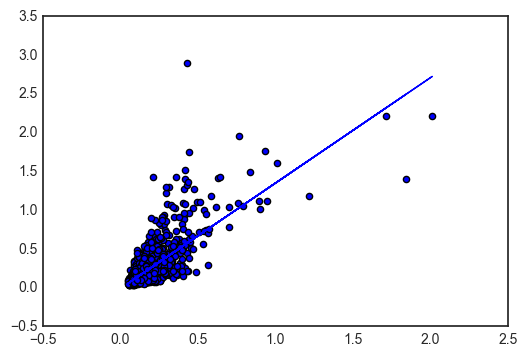

[[ 1.36045315]]
0.429554824449


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [540]:
from sklearn.linear_model import Ridge

tg = targets['TARGET_1']

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print(model.coef_)
print(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1)))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


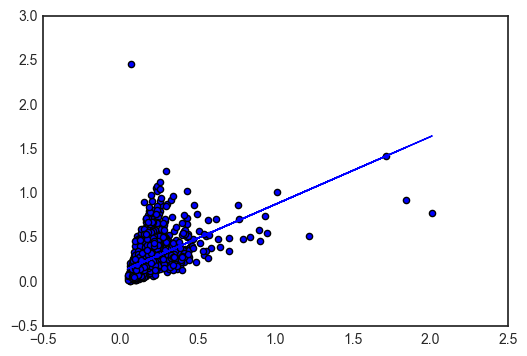

[[ 0.76360602]]
0.638408361146


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [541]:
from sklearn.linear_model import Ridge

tg = targets['TARGET_2']

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print(model.coef_)
print(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1)))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


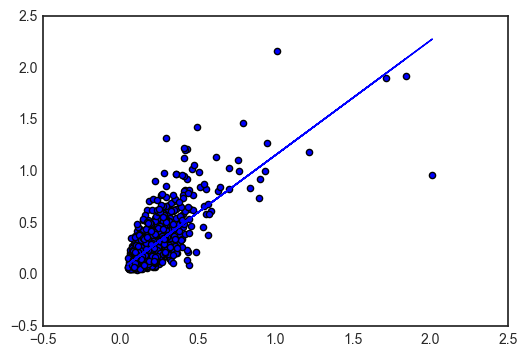

coef =  [[ 1.11024881]]
intercept =  [ 0.04809451]
err =  0.373118624603


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [553]:
from sklearn.linear_model import Ridge

tg = targets['TARGET']

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


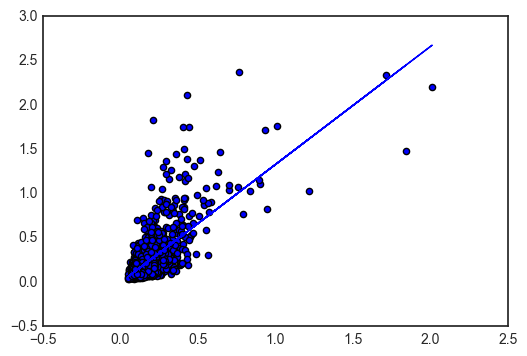

coef =  [[ 1.33221061]]
intercept =  [-0.00249992]
err =  0.510735812526


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [554]:
from sklearn.linear_model import Ridge

tg = targets['TARGET_4']

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


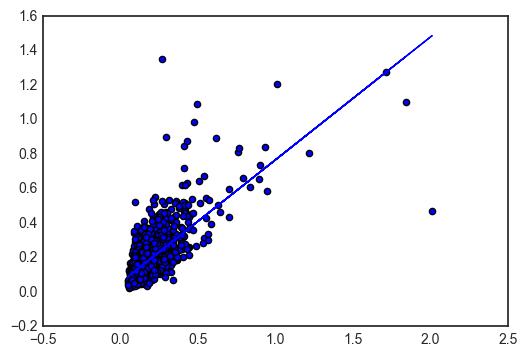

coef =  [[ 0.7132873]]
intercept =  [ 0.05469859]
err =  0.362243987771


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [555]:
from sklearn.linear_model import Ridge

tg = targets['TARGET_5']
tg = tg.fillna(tg.median())

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


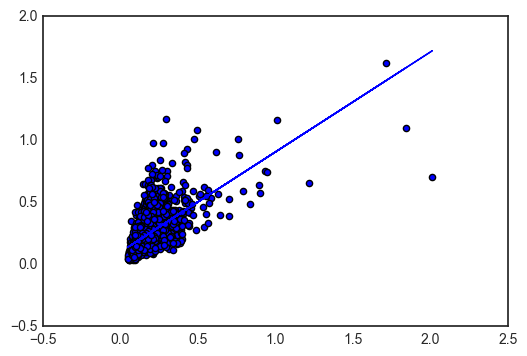

coef =  [[ 0.80631841]]
intercept =  [ 0.10162014]
err =  0.446093406668


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [556]:
from sklearn.linear_model import Ridge

tg = targets['TARGET_6']
tg = tg.fillna(tg.median())

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


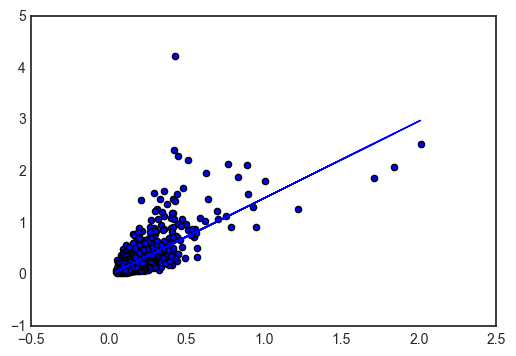

coef =  [[ 1.49110653]]
intercept =  [-0.00933012]
err =  0.474767586252


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [557]:
from sklearn.linear_model import Ridge

tg = targets['TARGET_7']
tg = tg.fillna(tg.median())

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

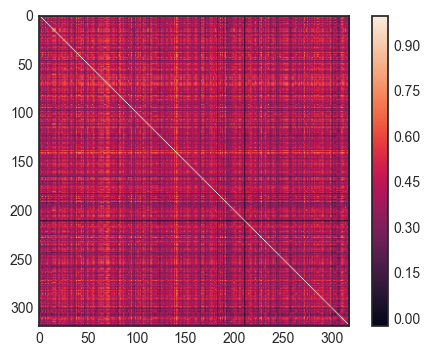

In [562]:
plt.clf()
plt.imshow(fuse[keys_volatility].corr())
plt.colorbar()
plt.show()

In [563]:
from sklearn.cluster import SpectralClustering


cluster = SpectralClustering(n_clusters = 20)
cluster.fit(similarity)

NameError: name 'similarity' is not defined

In [623]:
from sklearn.metrics.pairwise import pairwise_distances

copy_fuse = fuse[keys_volatility]
copy_fuse = copy_fuse.fillna(copy_fuse.median())

In [638]:
distances = pairwise_distances(copy_fuse.values.T,metric = 'cityblock')
delta = 3e2
similarity = np.exp(- distances ** 2 / (2. * delta ** 2))

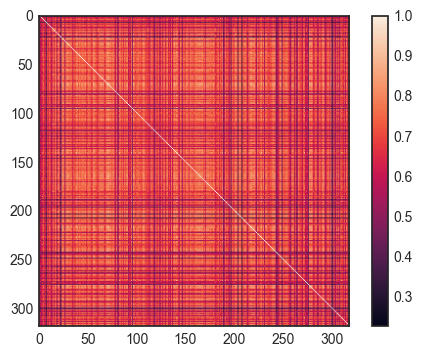

In [639]:
plt.show()
plt.imshow(similarity)
plt.colorbar()
plt.show()

In [641]:
from sklearn.cluster import SpectralClustering


cluster = SpectralClustering(n_clusters = 20)
cluster.fit(similarity)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=20, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

In [646]:
average = np.mean(fuse[keys_volatility].values[:,cluster.labels_ == 1],axis = 1)
average

array([ 0.07425328,  0.15453408,  0.35336494, ...,  0.1478133 ,
        0.16674506,  0.10402153])

In [643]:
from sklearn.linear_model import Ridge

tg = targets['TARGET_7']
tg = tg.fillna(tg.median())

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

318

In [651]:
indices = np.where(cluster.labels_ == 1)

In [653]:
curr = targets.loc[indices[0]]

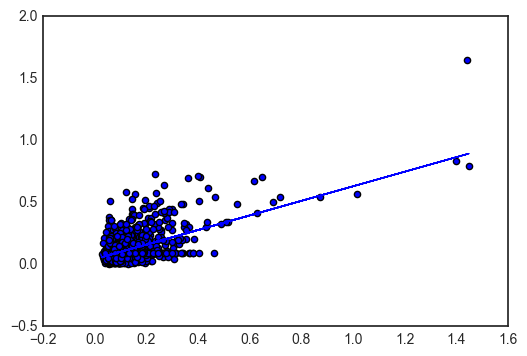

coef =  [[ 0.58768889]]
intercept =  [ 0.0427493]
err =  0.618535448821


In [664]:
from sklearn.linear_model import Ridge
averages = np.mean(copy_fuse[keys_volatility].values[:,cluster.labels_ == 1],axis = 1)

tg = targets
tg = tg.fillna(tg.median())
tg = tg.values[:,indices[0][0]]

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


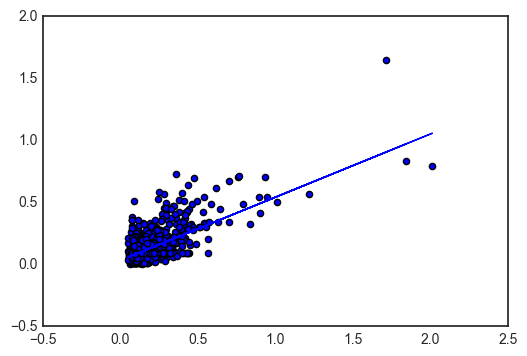

coef =  [[ 0.50956663]]
intercept =  [ 0.03331359]
err =  0.578260969735


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [667]:
from sklearn.linear_model import Ridge
averages = np.mean(fuse[keys_volatility],axis = 1)
tg = targets['TARGET_31']
tg = tg.fillna(tg.median())

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

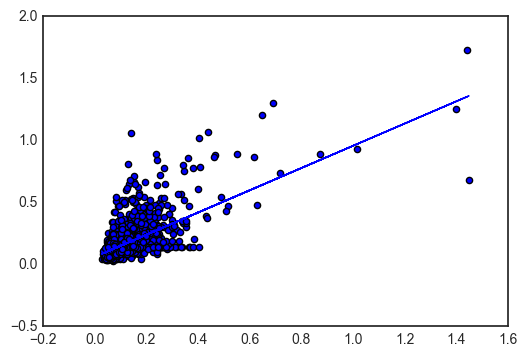

coef =  [[ 0.89696699]]
intercept =  [ 0.0599669]
err =  0.385501548368


In [668]:
from sklearn.linear_model import Ridge
averages = np.mean(copy_fuse[keys_volatility].values[:,cluster.labels_ == 1],axis = 1)

tg = targets
tg = tg.fillna(tg.median())
tg = tg.values[:,indices[0][1]]

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


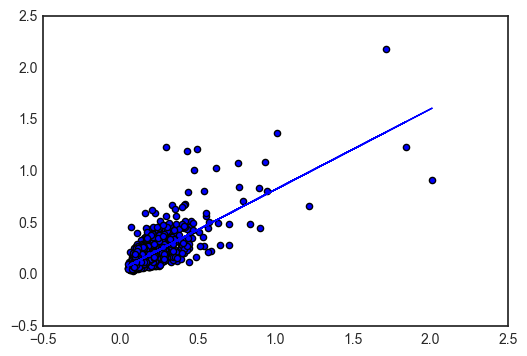

coef =  [[ 0.77854719]]
intercept =  [ 0.0473802]
err =  0.308443493488


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [864]:
from sklearn.linear_model import Ridge
averages = np.mean(fuse[keys_volatility],axis = 1)
tg = targets['TARGET_'+str(indices[0][1])]
tg = tg.fillna(tg.median())

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

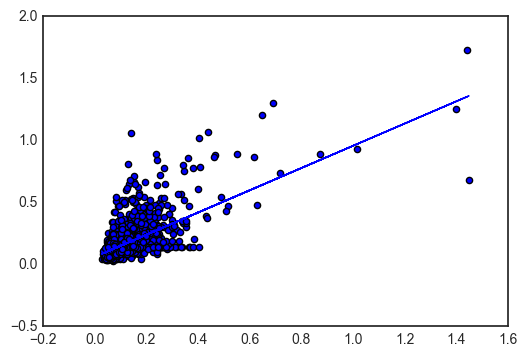

coef =  [[ 0.89696699]]
intercept =  [ 0.0599669]
err =  0.385501548368


In [673]:
from sklearn.linear_model import Ridge
averages = np.mean(copy_fuse[keys_volatility].values[:,cluster.labels_ == 1],axis = 1)

tg = targets
tg = tg.fillna(tg.median())
tg = tg.values[:,indices[0][1]]

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


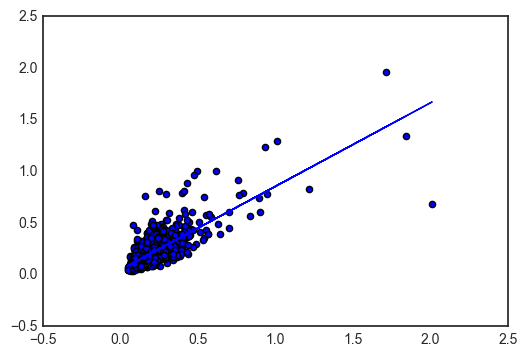

coef =  [[ 0.80807583]]
intercept =  [ 0.04845384]
err =  0.304380165892


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [672]:
from sklearn.linear_model import Ridge
averages = np.mean(fuse[keys_volatility],axis = 1)
tg = targets['TARGET_'+str(indices[0][2])]
tg = tg.fillna(tg.median())

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

# Now try on targets directly

In [746]:
from sklearn.metrics.pairwise import pairwise_distances

copy_fuse = targets.loc[0:500]
copy_fuse = copy_fuse.fillna(copy_fuse.median())

In [747]:
distances = pairwise_distances(copy_fuse.values.T,metric = 'cityblock')
delta = 5e1
similarity = np.exp(- distances ** 2 / (2. * delta ** 2))

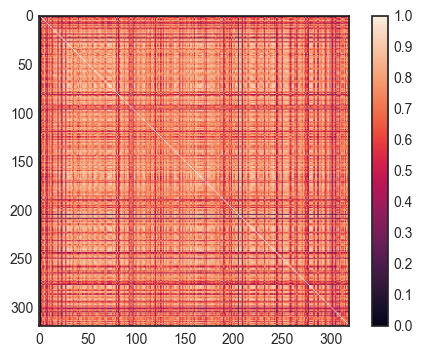

In [748]:
plt.show()
plt.imshow(similarity)
plt.colorbar()
plt.show()

In [749]:
from sklearn.cluster import SpectralClustering


cluster = SpectralClustering(n_clusters = 10)
cluster.fit(similarity)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=10, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

In [750]:
copy_fuse = fuse[keys_volatility]
copy_fuse = copy_fuse.fillna(copy_fuse.median())

In [751]:
average = np.mean(fuse[keys_volatility].values[:,cluster.labels_ == 1],axis = 1)
average

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 318 but corresponding boolean dimension is 319
  if __name__ == '__main__':


array([ 0.08956661,  0.21251053,  0.43368483, ...,  0.21383722,
        0.27457478,  0.08290966])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 318 but corresponding boolean dimension is 319
  from ipykernel import kernelapp as app


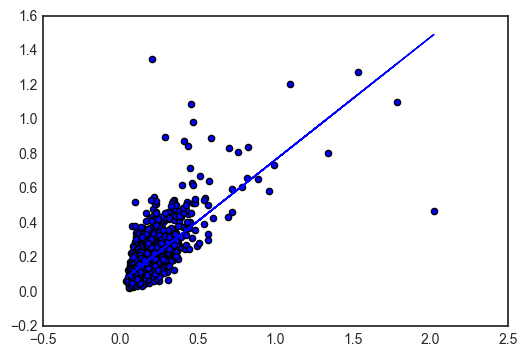

coef =  [[ 0.71169377]]
intercept =  [ 0.05663126]
err =  0.375279341858


In [752]:
from sklearn.linear_model import Ridge
averages = np.mean(copy_fuse[keys_volatility].values[:,cluster.labels_ == 1],axis = 1)

tg = targets
tg = tg.fillna(tg.median())
tg = tg.values[:,indices[0][0]]

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


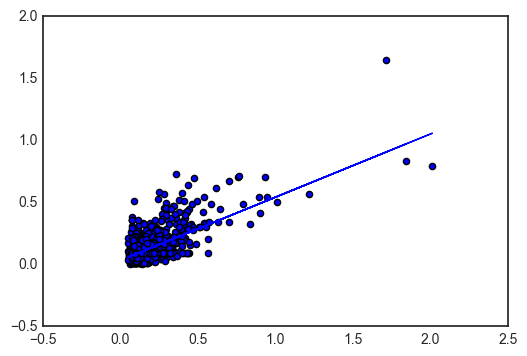

coef =  [[ 0.50956663]]
intercept =  [ 0.03331359]
err =  0.578260969735
err biased=  0.479216494661


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [773]:
from sklearn.linear_model import Ridge
averages = np.mean(fuse[keys_volatility],axis = 1)
tg = targets['TARGET_31']
tg = tg.fillna(tg.median())

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

bias = 0.02
biased_estimate = model.predict(averages.reshape(-1,1)) - bias
print('err biased= ',(np.mean(np.abs(tg.reshape(-1,1)- biased_estimate)/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 318 but corresponding boolean dimension is 319
  from ipykernel import kernelapp as app


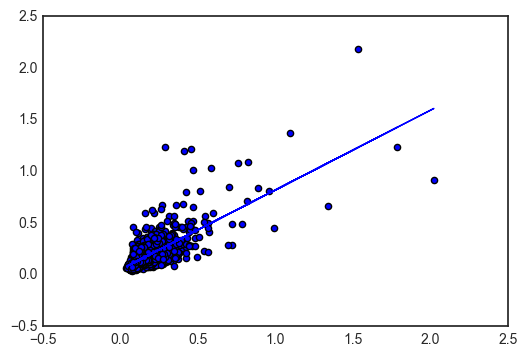

coef =  [[ 0.77131031]]
intercept =  [ 0.05034809]
err =  0.320932289466
err biased=  0.27506444603


In [772]:
from sklearn.linear_model import Ridge
averages = np.mean(copy_fuse[keys_volatility].values[:,cluster.labels_ == 1],axis = 1)

tg = targets
tg = tg.fillna(tg.median())
tg = tg.values[:,indices[0][1]]

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

bias = 0.02
biased_estimate = model.predict(averages.reshape(-1,1)) - bias
print('err biased= ',(np.mean(np.abs(tg.reshape(-1,1)- biased_estimate)/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


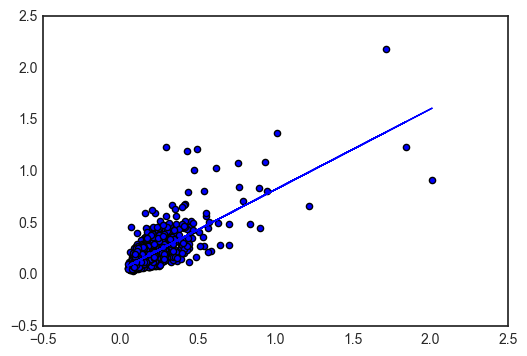

coef =  [[ 0.77854719]]
intercept =  [ 0.0473802]
err =  0.308443493488
err biased=  0.26444182348


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [771]:
from sklearn.linear_model import Ridge
averages = np.mean(fuse[keys_volatility],axis = 1)
tg = targets['TARGET_'+str(indices[0][1])]
tg = tg.fillna(tg.median())

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

bias = 0.02
biased_estimate = model.predict(averages.reshape(-1,1)) - bias
print('err biased= ',(np.mean(np.abs(tg.reshape(-1,1)- biased_estimate)/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 318 but corresponding boolean dimension is 319
  from ipykernel import kernelapp as app


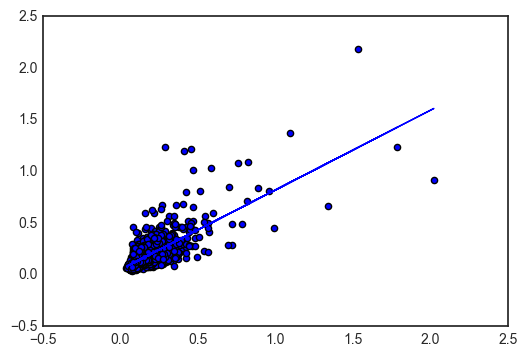

coef =  [[ 0.77131031]]
intercept =  [ 0.05034809]
err =  0.320932289466


In [756]:
from sklearn.linear_model import Ridge
averages = np.mean(copy_fuse[keys_volatility].values[:,cluster.labels_ == 1],axis = 1)

tg = targets
tg = tg.fillna(tg.median())
tg = tg.values[:,indices[0][1]]

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


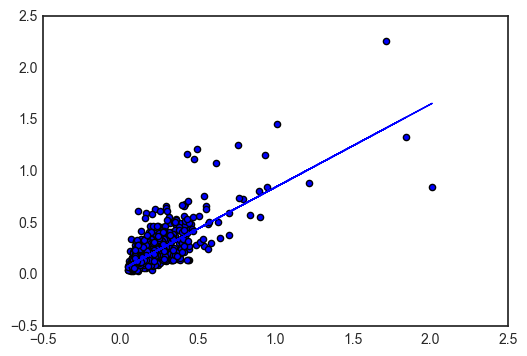

coef =  [[ 0.80319427]]
intercept =  [ 0.04437832]
err =  0.315421022195


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [757]:
from sklearn.linear_model import Ridge
averages = np.mean(fuse[keys_volatility],axis = 1)
tg = targets['TARGET_'+str(indices[0][2])]
tg = tg.fillna(tg.median())

model = Ridge()
model.fit(averages.reshape(-1,1),tg.reshape(-1,1))

plt.scatter(averages,tg)
plt.plot(averages,model.predict(averages.reshape(-1,1)))
plt.show()

print('coef = ',model.coef_)
print('intercept = ',model.intercept_)
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- model.predict(averages.reshape(-1,1)))/tg.reshape(-1,1))))

In [766]:
biased_estimate = model.predict(averages.reshape(-1,1)) - 0.02

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [767]:
print('err = ',(np.mean(np.abs(tg.reshape(-1,1)- biased_estimate)/tg.reshape(-1,1))))

err =  0.271709908568


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [967]:
cluster.labels_

array([9, 1, 8, 3, 9, 7, 0, 9, 1, 4, 9, 1, 1, 1, 3, 7, 3, 7, 4, 1, 2, 7, 3,
       1, 1, 7, 7, 1, 7, 2, 2, 1, 2, 7, 6, 3, 7, 7, 4, 6, 5, 6, 7, 4, 2, 2,
       7, 2, 5, 1, 6, 7, 7, 2, 6, 3, 2, 2, 2, 1, 7, 4, 7, 4, 5, 1, 5, 3, 6,
       7, 5, 5, 5, 2, 5, 6, 2, 7, 6, 0, 5, 8, 9, 6, 7, 7, 2, 3, 5, 4, 2, 5,
       9, 1, 0, 6, 8, 5, 2, 9, 1, 7, 7, 1, 6, 7, 7, 2, 5, 6, 1, 7, 3, 1, 3,
       2, 4, 5, 3, 8, 4, 3, 1, 7, 8, 0, 2, 8, 7, 7, 0, 7, 2, 3, 4, 3, 7, 3,
       2, 2, 2, 6, 4, 4, 8, 2, 2, 0, 2, 7, 4, 5, 4, 7, 3, 2, 5, 4, 2, 1, 7,
       7, 2, 5, 2, 5, 5, 6, 5, 6, 5, 8, 5, 7, 2, 7, 7, 4, 4, 5, 4, 3, 1, 2,
       7, 0, 6, 4, 6, 8, 3, 6, 2, 2, 6, 0, 1, 1, 2, 4, 3, 5, 6, 2, 1, 7, 5,
       7, 1, 6, 7, 1, 2, 4, 3, 4, 7, 2, 2, 2, 5, 5, 6, 8, 5, 2, 4, 4, 6, 4,
       5, 8, 7, 5, 7, 6, 4, 2, 7, 2, 7, 5, 4, 8, 8, 1, 4, 4, 5, 1, 4, 7, 7,
       2, 7, 7, 4, 8, 8, 2, 2, 7, 3, 4, 1, 3, 5, 7, 4, 1, 3, 7, 6, 8, 3, 9,
       8, 2, 5, 5, 2, 3, 1, 7, 7, 9, 1, 7, 1, 6, 4, 2, 5, 9, 0, 6, 7, 2, 9,
       5, 1,

# Work on the augmented dataset

In [845]:
from sklearn.linear_model import LogisticRegression

y = ((target['TARGET'])).values

copy = copy_data.copy()

del copy['date']
del copy['TARGET']

X = copy.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = XGBRegressor(booster = 'gbtree',n_jobs = 5)

model.fit(X_train,y_train)


y_pred = model.predict(X_test)-0.02
np.mean(np.abs(y_pred - y_test)/(y_test))

0.23674510598944168

In [849]:
y_pred = model.predict(X_test)-0.015
np.mean(np.abs(y_pred - y_test)/(y_test))

0.2360671135752245

In [822]:
for col in copy.columns:
    print(col)

ID
product_id
volatility 09:30:00
volatility 09:35:00
volatility 09:40:00
volatility 09:45:00
volatility 09:50:00
volatility 09:55:00
volatility 10:00:00
volatility 10:05:00
volatility 10:10:00
volatility 10:15:00
volatility 10:20:00
volatility 10:25:00
volatility 10:30:00
volatility 10:35:00
volatility 10:40:00
volatility 10:45:00
volatility 10:50:00
volatility 10:55:00
volatility 11:00:00
volatility 11:05:00
volatility 11:10:00
volatility 11:15:00
volatility 11:20:00
volatility 11:25:00
volatility 11:30:00
volatility 11:35:00
volatility 11:40:00
volatility 11:45:00
volatility 11:50:00
volatility 11:55:00
volatility 12:00:00
volatility 12:05:00
volatility 12:10:00
volatility 12:15:00
volatility 12:20:00
volatility 12:25:00
volatility 12:30:00
volatility 12:35:00
volatility 12:40:00
volatility 12:45:00
volatility 12:50:00
volatility 12:55:00
volatility 13:00:00
volatility 13:05:00
volatility 13:10:00
volatility 13:15:00
volatility 13:20:00
volatility 13:25:00
volatility 13:30:00
volati

In [831]:
copy_data

ID  date  product_id  volatility 09:30:00  volatility 09:35:00  \
0            1     1           1             0.662737             0.716896   
1            2     1           2             0.285394             0.379560   
2            3     1           3             1.151646             1.093562   
3            4     1           4             0.835260             0.329615   
4            5     1           5             0.274185             0.061076   
5            6     1           6             1.196894             0.447793   
6            7     1           7             0.404367             0.461279   
7            8     1           8             0.427583             0.332903   
8            9     1           9             0.261116             0.714536   
9           10     1          10             0.256359             0.359924   
10          11     1          11             0.578564             0.236604   
11          12     1          12             0.566552             0.188851   
12          13     1          13             0.980909             0.210090   
13          14     1          14             1.304351             0.854274   
14          15     1          15             0.257395             0.235594   
15          16     1          16             0.380117             0.370311   
16          17     1          17             0.230236             0.092094   
17          18     1          18             0.829830             0.207212   
18          19     1          19             0.388400             0.100232   
19          20     1          20             0.336749             0.157326   
20          21     1          21             0.267855             0.185656   
21          22     1          22             0.742260             0.283894   
22          23     1          23             0.608003             1.259672   
23          24     1          24             0.409156             0.305363   
24          25     1          25             0.591217             0.207824   
25          26     1          26             0.163846             0.067028   
26          27     1          27             0.491169             1.004708   
27          28     1          28             0.914378             0.341534   
28          29     1          29             0.481540             0.131262   
29          30     1          30             0.000000             0.188081   
...        ...   ...         ...                  ...                  ...   
636283  636284  2117         289             0.063182             0.168486   
636284  636285  2117         290             0.619668             0.769253   
636285  636286  2117         291             1.006989             1.038799   
636286  636287  2117         292             0.423908             0.469227   
636287  636288  2117         293             0.244941             0.132795   
636288  636289  2117         294             0.157210             0.603009   
636289  636290  2117         295             0.319250             0.541670   
636290  636291  2117         296             0.270156             0.216527   
636291  636292  2117         297             0.395209             0.313822   
636292  636293  2117         298             0.403118             0.798655   
636293  636294  2117         299             0.288685             0.255282   
636294  636295  2117         300             0.131829             0.066007   
636295  636296  2117         301             0.092281             0.213085   
636296  636297  2117         302             0.473387             0.289450   
636297  636298  2117         303             0.266633             0.648397   
636298  636299  2117         304             0.178007             0.178143   
636299  636300  2117         305             0.170790             0.234574   
636300  636301  2117         306             0.483656             0.196741   
636301  636302  2117         307             0.415971             0.289256   
636302  636303  2117         308  

In [836]:
x_data

ERROR_FIT_EXPONENTIAL  volatility 13:55:00  volatility 13:50:00  \
0                    0.105259             0.052386             0.136218   
1                    0.038854             0.071155             0.059276   
2                    0.150655             0.117980             0.111488   
3                    0.077895             0.155294             0.082934   
4                    0.071397             0.000000             0.112193   
5                    0.079176             0.081571             0.081553   
6                    0.077237             0.072930             0.043758   
7                    0.099942             0.144437             0.256688   
8                    0.066615             0.045695             0.045702   
9                    0.092578             0.210295             0.114941   
10                   0.056647             0.052893             0.065094   
11                   0.064858             0.036312             0.094411   
12                   0.092603             0.177648             0.047445   
13                   0.142813             0.145022             0.272180   
14                   0.052872             0.048551             0.215808   
15                   0.103073             0.118777             0.259389   
16                   0.054781             0.046293             0.157445   
17                   0.069481             0.104176             0.159713   
18                   0.084604             0.124989             0.112701   
19                   0.077207             0.120379             0.180903   
20                   0.076050             0.044936             0.000000   
21                   0.113535             0.081096             0.538521   
22                   0.184588             0.099342             0.369096   
23                   0.098514             0.134108             0.134236   
24                   0.070534             0.048441             0.115025   
25                   0.053977             0.022472             0.074929   
26                   0.098414             0.101815             0.101879   
27                   0.065019             0.049853             0.085410   
28                   0.045697             0.091798             0.063892   
29                   0.078687             0.019773             0.138440   
...                       ...                  ...                  ...   
636283               0.056949             0.000000             0.000000   
636284               0.093401             0.165137             0.101497   
636285               0.111791             0.132841             0.227597   
636286               0.078346             0.090556             0.075508   
636287               0.067217             0.153927             0.061479   
636288               0.082441             0.258045             0.057242   
636289               0.055142             0.081195             0.013543   
636290               0.047953             0.036668             0.048890   
636291               0.067673             0.008959             0.049256   
636292               0.075760             0.076083             0.093690   
636293               0.054021             0.084566             0.050722   
636294               0.098472             0.065545             0.196634   
636295               0.031261             0.034629             0.051937   
636296               0.088645             0.039341             0.078676   
636297               0.047024             0.016060             0.144489   
636298               0.044923             0.041227             0.061837   
636299               0.056601             0.031850             0.042476   
636300               0.113030             0.120138             0.150221   
636301               0.089759             0.505604             0.290051   
636302               0.122005             0.072809             0.193329   
636303               0.059812             0.039942             0.053267   
636304               0.039813    

In [952]:
# Full dataset to flle...

data.to_csv('FULL_DATA.csv',sep = ';',index = False)

In [951]:
data.shape

(636313, 223)

In [971]:
targets['TARGET_211']

0       0.001008
1       0.071467
2       0.297774
3            NaN
4       0.107599
5       0.098596
6       0.059200
7       0.010155
8       0.080910
9       0.125550
10      0.018457
11      0.150438
12      0.049012
13      0.060922
14           NaN
15           NaN
16      0.091585
17           NaN
18      0.118256
19      0.150839
20      0.113349
21           NaN
22      0.023654
23           NaN
24      0.092224
25           NaN
26      0.324957
27      0.140430
28           NaN
29      0.078198
          ...   
2087    0.163917
2088    0.120761
2089         NaN
2090    0.041469
2091    0.252181
2092         NaN
2093         NaN
2094    0.138206
2095    0.067088
2096    0.116454
2097         NaN
2098    0.010716
2099    0.100282
2100         NaN
2101    0.364614
2102    0.068625
2103    0.077980
2104    0.067827
2105    0.052476
2106    0.039427
2107         NaN
2108    0.163093
2109    0.111942
2110    0.057551
2111         NaN
2112    0.057110
2113    0.062857
2114    0.1672

In [972]:
targets['TARGET_34']

0       0.185412
1       0.270137
2       0.470074
3            NaN
4       0.047403
5       0.037976
6       0.347911
7       0.026215
8       0.141811
9       0.354199
10      0.065723
11      0.226145
12      0.122778
13      0.101855
14           NaN
15           NaN
16      0.180140
17      0.111255
18      0.183107
19      0.522351
20      0.103947
21           NaN
22      0.026186
23           NaN
24      0.166231
25           NaN
26      0.130268
27      0.104097
28           NaN
29      0.344131
          ...   
2087    0.086562
2088    0.303324
2089         NaN
2090    0.060996
2091    0.399484
2092    0.128595
2093         NaN
2094    0.125378
2095    0.087732
2096    0.138634
2097         NaN
2098    0.138554
2099    0.393702
2100         NaN
2101    0.422432
2102    0.117196
2103    0.124827
2104    0.124225
2105    0.115157
2106    0.062625
2107         NaN
2108    0.847887
2109         NaN
2110    0.264781
2111         NaN
2112    0.017060
2113    0.082963
2114    0.2915

In [975]:
targets[['TARGET_211','TARGET_34','TARGET_31','TARGET_48','TARGET_70','TARGET_117','TARGET_40']].corr()

TARGET_211  TARGET_34  TARGET_31  TARGET_48  TARGET_70  \
TARGET_211    1.000000   0.472093   0.430701   0.425398   0.483789   
TARGET_34     0.472093   1.000000   0.701176   0.789959   0.855201   
TARGET_31     0.430701   0.701176   1.000000   0.680898   0.789420   
TARGET_48     0.425398   0.789959   0.680898   1.000000   0.847216   
TARGET_70     0.483789   0.855201   0.789420   0.847216   1.000000   
TARGET_117    0.457053   0.787974   0.694891   0.720367   0.858578   
TARGET_40     0.471071   0.744295   0.699311   0.699066   0.815251   

            TARGET_117  TARGET_40  
TARGET_211    0.457053   0.471071  
TARGET_34     0.787974   0.744295  
TARGET_31     0.694891   0.699311  
TARGET_48     0.720367   0.699066  
TARGET_70     0.858578   0.815251  
TARGET_117    1.000000   0.686127  
TARGET_40     0.686127   1.000000

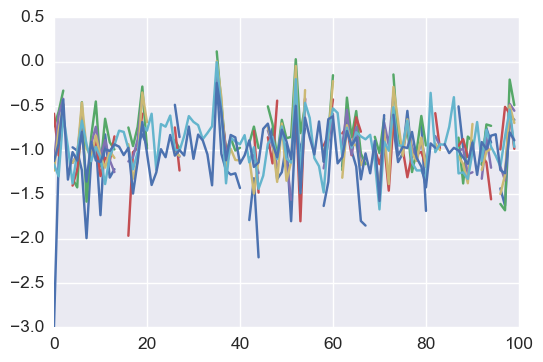

In [983]:
plt.clf()
plt.plot(np.log10(targets[['TARGET_211','TARGET_34','TARGET_31','TARGET_48','TARGET_70','TARGET_117','TARGET_40']])[0:100])
plt.show()